*AutoPricePred*
-------

*Descriptions :*
---------------------
This data set consists of three types of entities: 
 -  the specification of an auto in terms of various characteristics, 
-  its assigned insurance risk rating, 
-  its normalized losses in use as compared to other cars.

*Risky_Factor_Study:*

  The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price.Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos 
within a particular size classification (two-door small, station wagons,sports/speciality, etc...), and represents the average loss per car per year.

*Number of Instances:* 205 |  *Number of Attributes:* 26 total
- 15 continuous
- 1 integer
- 10 nominal
   
*Attribute Information :* 
------
- symboling = Is used for insurance purpose.
- normalized_losses = Represents the average loss payment per insured vehicle year.
- car_type = Model of the car
- aspiration = Refers to the method used to introduce air into the engine's combustion chamber( Naturally Aspirated or naturally "breathing" engines,defines those that take in air under normal means at normal atmospheric pressure.The more air that enders into the combustion chambers of an engine, the more fuel can be added creating bigger explosions and generating more power).
- drive_wheels =  The drive wheel is a wheel of motor vehicle that transmits force,transforming torque into  tractive force from the tires to the road ,causing the vehicle to move.
- bore = Represents a diameter of each cylinder in engine.
- stroke = Represents the distance the piston travels within the cylinder.
- peak_rpm = Is a indicating the engine's speed.
- city_mpg = Estimated miles per gallon the car can achieve in city driving conditions.
- price =  represents the suggested retail price or cost of the car.

1.rpm = Revolutions Per Minute,
2.mpg = Mile Per Gallon  [     *Its  a unit of measurement used to express the fuel efficiency of a vehicle,indicating how many 
miles it can travel on one gallon fuel.*]

*Note :* 
------
Several of the attributes in the database could be used as a "class" attribute.

*Objective :*
-----------------
The aim here is to explore the data set and find basic relationships of different features with an automobile's price. We will be starting with some brief exploratory analysis involving summary statistics and graphical visualization. We also want to see if there is a way to predict the price of the automobiles given all the information we have. We will be comparing a few different regression models to find the best one.
- Firstly, we will investigate the fuel consumption rate (L/100km) specifically for diesel cars, shedding light on their efficiency and potential cost savings. 
- Secondly, we will identify the main characteristics that significantly impact car prices, enabling customers to gauge the value they are receiving.
- Additionally, we will explore whether the dealer's trade-in offer aligns with fair market value, providing customers with confidence during negotiations. Lastly, we will assess whether customers themselves have accurately appraised the value of their cars.
By addressing these questions, we aim to identify the features that offer the best value for money, empowering customers with comprehensive insights to guide their car purchasing decisions.

*Business Case :*
------------
The Dataset is about,How the price vary with independent features.

*Data Exploration:*
-------------
Import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings as wn
wn.filterwarnings("ignore")

In [3]:
df = pd.read_csv("auto_imports.csv")

In [4]:
pd.set_option("display.max().columns",None)
pd.set_option("display.max().rows",None)

*BASIC CHECKS* = head,tail,info,describe,shape,dtypes,isnull,counts

In [5]:
# Show the first 4 rows using the dataframes;

df.head(4)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Show the last 4 rows using the dataframes;

df.tail(4)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
df.shape 
# 200 = rows ,26 = columns

(200, 26)

In [8]:
# Change the given features names;

df.rename(columns={'3':"symboling",'?':"normalized_losses",'alfa-romero':"car_type", 'gas':"fuel_type", 'std':"aspiration", 
                   'two':"no_of_doors",'convertible':"body_style", 'rwd':"drive_wheels", 'front':"engine_location", '88.60':"wheel_base",
                   '168.80':"length", '64.10':" width",'48.80':"height",'2548':"curb_weight", 'dohc':"engine_type", 'four':"no_of_cylinders", 
                   '130':"engine_size", 'mpfi':"fuel_system",'3.47':"bore", '2.68':"stroke", '9.00':"compression_ratio", '111':"horsepower",
                   '5000':"peak_rpm", '21':"city_mpg", '27':"highway_mpg","13495":"price"},inplace=True)

In [9]:
# check ,about the give data information;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   car_type           200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   no_of_doors        200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11   width             200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  no_of_cylinders    200 non-null    object 
 16  engine_size        200 non

In [10]:
df.columns

Index(['symboling', 'normalized_losses', 'car_type', 'fuel_type', 'aspiration',
       'no_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', ' width', 'height', 'curb_weight',
       'engine_type', 'no_of_cylinders', 'engine_size', 'fuel_system', 'bore',
       'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [11]:
# Describe numerical columns;
# And description also used for find changes on the data expecially (mean,median and mode,std,skewness and kurtosis)

num_col = df.describe()
num_col

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [12]:
# Describe  object columns;

obj_col = df.describe(include="O")
obj_col

,normalized_losses,car_type,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,engine_type,no_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


*Data Wrangling :*
--------------
*Identify and handle missing values:* 
- Before analysing and visualizing the data .Let us look for the missing value in the dataset .From the dataset it is noticed that there are few missing values,which are represented using special charecters.

- The first aim is to replace all the special charecters to NAN and then to choose the best method in removing the missing values.

In [13]:
# Given data DataFrame;

df.columns.to_frame()

,0
symboling,symboling
normalized_losses,normalized_losses
car_type,car_type
fuel_type,fuel_type
aspiration,aspiration
no_of_doors,no_of_doors
body_style,body_style
drive_wheels,drive_wheels
engine_location,engine_location
wheel_base,wheel_base


In [14]:
# Let's convert the special charecter's to NAN value;

for col in df.columns:
    df[col].replace({"?":np.nan},inplace=True)

In [15]:
df.isnull().sum()

symboling             0
normalized_losses    36
car_type              0
fuel_type             0
aspiration            0
no_of_doors           2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
 width                0
height                0
curb_weight           0
engine_type           0
no_of_cylinders       0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

from the above codes ,we have filled up all those missing values,with meaningfull values for analysis.But let's check it before
proceeding to the next steps.

*Data Preprocessing:*
--------------
Now convert all cetegorical columns into Numerical columns.
-  The missing numerical data type in some of the attributes was replaced by its average value
-  The missing categorical data type in some of the attributes was substituted by its most frequent.
- The numbers in the arrays are the coefficients of each predictors variables.
Adding both the intercept and the product of each coefficient and its predictor variable will give the modeling equation of the price as the target variable.

In [16]:
missing_value = ['normalized_losses','bore','stroke','horsepower','peak_rpm']
for col in missing_value:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(),inplace=True)

In [17]:
# Feature=>1:

df["car_type"].value_counts().to_frame()

,count
car_type,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11


In [18]:
df["car_type"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
len(df["car_type"].unique())

22

In [20]:
df['car_type'] = df['car_type'].map({'alfa-romero':20, 'audi':13, 'bmw':11, 'chevrolet':17, 'dodge':9, 'honda':4,
       'isuzu':18, 'jaguar':16, 'mazda':2, 'mercedes-benz':10, 'mercury':21,
       'mitsubishi':3, 'nissan':1, 'peugot':7, 'plymouth':12, 'porsche':15, 'renault':19,
       'saab':14, 'subaru':6, 'toyota':0, 'volkswagen':5, 'volvo':8})


In [21]:
# Feature=>2:

df["fuel_type"].value_counts().to_frame()

,count
fuel_type,
gas,180
diesel,20


In [22]:
df["fuel_type"].unique()

array(['gas', 'diesel'], dtype=object)

In [23]:
df["fuel_type"] = df["fuel_type"].map({'gas':0, 'diesel':1})

In [24]:
# Feature=>3:

df["aspiration"].value_counts().to_frame()

,count
aspiration,
std,164
turbo,36


In [25]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [26]:
df["aspiration"] = df["aspiration"].map({'std':0, 'turbo':1})

In [27]:
# Feature=>4:

df[df.columns[df.isnull().any()]].head()

,no_of_doors
0,two
1,two
2,four
3,four
4,two


In [28]:
df["no_of_doors"].value_counts().to_frame()

,count
no_of_doors,
four,113
two,85


In [29]:
df["no_of_doors"].unique()

array(['two', 'four', nan], dtype=object)

In [30]:
df["no_of_doors"].mode()

0    four
Name: no_of_doors, dtype: object

In [31]:
df.loc[25,"no_of_doors"]="four"

In [32]:
df.loc[59,"no_of_doors"]="four"

In [33]:
df["no_of_doors"].isnull().sum()

0

In [34]:
df["no_of_doors"].unique()

array(['two', 'four'], dtype=object)

In [35]:
df["no_of_doors"].value_counts().to_frame()

,count
no_of_doors,
four,115
two,85


In [36]:
df["no_of_doors"] = df["no_of_doors"].map({'two':1, 'four':0})

In [37]:
df["no_of_doors"].isnull().any()

False

In [38]:
# Feature=>5:

df["body_style"].value_counts().to_frame()

,count
body_style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,5


In [39]:
df["body_style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [40]:
df["body_style"] = df["body_style"].map({'convertible':4, 'hatchback':1, 'sedan':0, 'wagon':2, 'hardtop':3})

In [41]:
# Feature=>6:

df["drive_wheels"].value_counts().to_frame()

,count
drive_wheels,
fwd,118
rwd,74
4wd,8


In [42]:
df["drive_wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [43]:
df["drive_wheels"] = df["drive_wheels"].map({'rwd':1, 'fwd':0, '4wd':2})

In [44]:
# Feature=>7:

df["engine_location"].value_counts().to_frame()

,count
engine_location,
front,197
rear,3


In [45]:
df["engine_location"].unique()

array(['front', 'rear'], dtype=object)

In [46]:
df["engine_location"] = df["engine_location"].map({'front':0, 'rear':1})

In [47]:
df["engine_location"].dtypes

dtype('int64')

In [48]:
# Feature=>8:

df["engine_type"].value_counts().to_frame()

,count
engine_type,
ohc,145
ohcf,15
ohcv,13
l,12
dohc,11
rotor,4


In [49]:
df["engine_type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [50]:
df["engine_type"] = df["engine_type"].map({'dohc':4, 'ohcv':2, 'ohc':0, 'l':3, 'rotor':5, 'ohcf':1})

In [51]:
# Feature=>9:

df["no_of_cylinders"].value_counts().to_frame()

,count
no_of_cylinders,
four,156
six,24
five,10
two,4
eight,4
three,1
twelve,1


In [52]:
df["no_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [53]:
df["no_of_cylinders"] = df["no_of_cylinders"].map({'four':0, 'six':1, 'five':2, 'three':5, 'twelve':6, 'two':3, 'eight':4})

In [54]:
# Feature=>10:

df["fuel_system"].value_counts().to_frame()

,count
fuel_system,
mpfi,91
2bbl,64
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


In [55]:
df["fuel_system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [56]:
df["fuel_system"] = df["fuel_system"].map({'mpfi':0, '2bbl':1, 'mfi':6 , '1bbl':3, 'spfi':7, '4bbl':5, 'idi':2, 'spdi':4})

In [57]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized_losses,car_type,fuel_type,aspiration,no_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,no_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*Data Standardisation:*
---------------
- Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation)
- Basically, standardisation is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

Example:Transform mpg to L/100km:
In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.
- We will need to apply data transformation to transform mpg into L/100km.
- The formula for unit conversion is:L/100km = 235 / mpg
- We can do many mathematical operations directly in Pandas.
 what is the fuel consumption (L/100k) rate for the diesel car ?

In [58]:
# Feature=>11;
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

df["city_L/100km"] =235/df["city_mpg"]
df.drop(["city_mpg"],axis=1,inplace=True)

In [59]:
# Feature=>12;
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

df["highway_mpg"] = 235/df["highway_mpg"]
df.rename(columns = {"highway_mpg":"highway_L/100km"},inplace=True)

Accorting to the above example,we transform mpg to L/100km  in the columns of "city_mpg","highway_mpg" change the name of 
columns to "city_L/100km","highway_L/100km"  

*EDA:*
------
The distribution of the data points on the plots shows that the linear assumption on the model is correct. The data points tend to be close to one another on the visualization. 

The closeness of the data points in the model shows the level of accuracy of the predicted outcomes and the actual outcomes. The difference in the actual and the predicted outcomes might be due to some missing values in the dataset. 

*Here are some of the basic chart types used to visualize data :*

- *Bar plots:* Bar plots are used to display the counts or frequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable.

- *Histograms:* Histograms are similar to bar plots, except that they are used for numeric variables

- *Box plots:* Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation.

- *Kernel Density Estimation Plots:* Kernel density estimation uses a moving denisty kernel to average the density of the distribution. These are similar to Histogram, except that they show a smooth curve.

- *Scatter plots:* A basic scatter plot shows the relationship between two variables. Points are ploted at the x-y coordinates of each value pair. Pair wise plots, also know as plot matrices, allow you to view multiple dimensions of a data set on one plot.A scatter plot is shown of each variable versus all other variables, arranged in an array.

- *Line plots:* Line plots are used to show the relationship between variables with ordered values.

- *Correlation plots:* The correlation structure of a multivariate data set can provide some useful insight. However, it is hard to derive much insight by just looking at the matrix of numbers. A visualization can be useful in getting an overall impression of which variables have siginificant correlation

In [60]:
# Histplot,densityplot,boxplot,scatterplot these plots are majorly used for outliers detection.

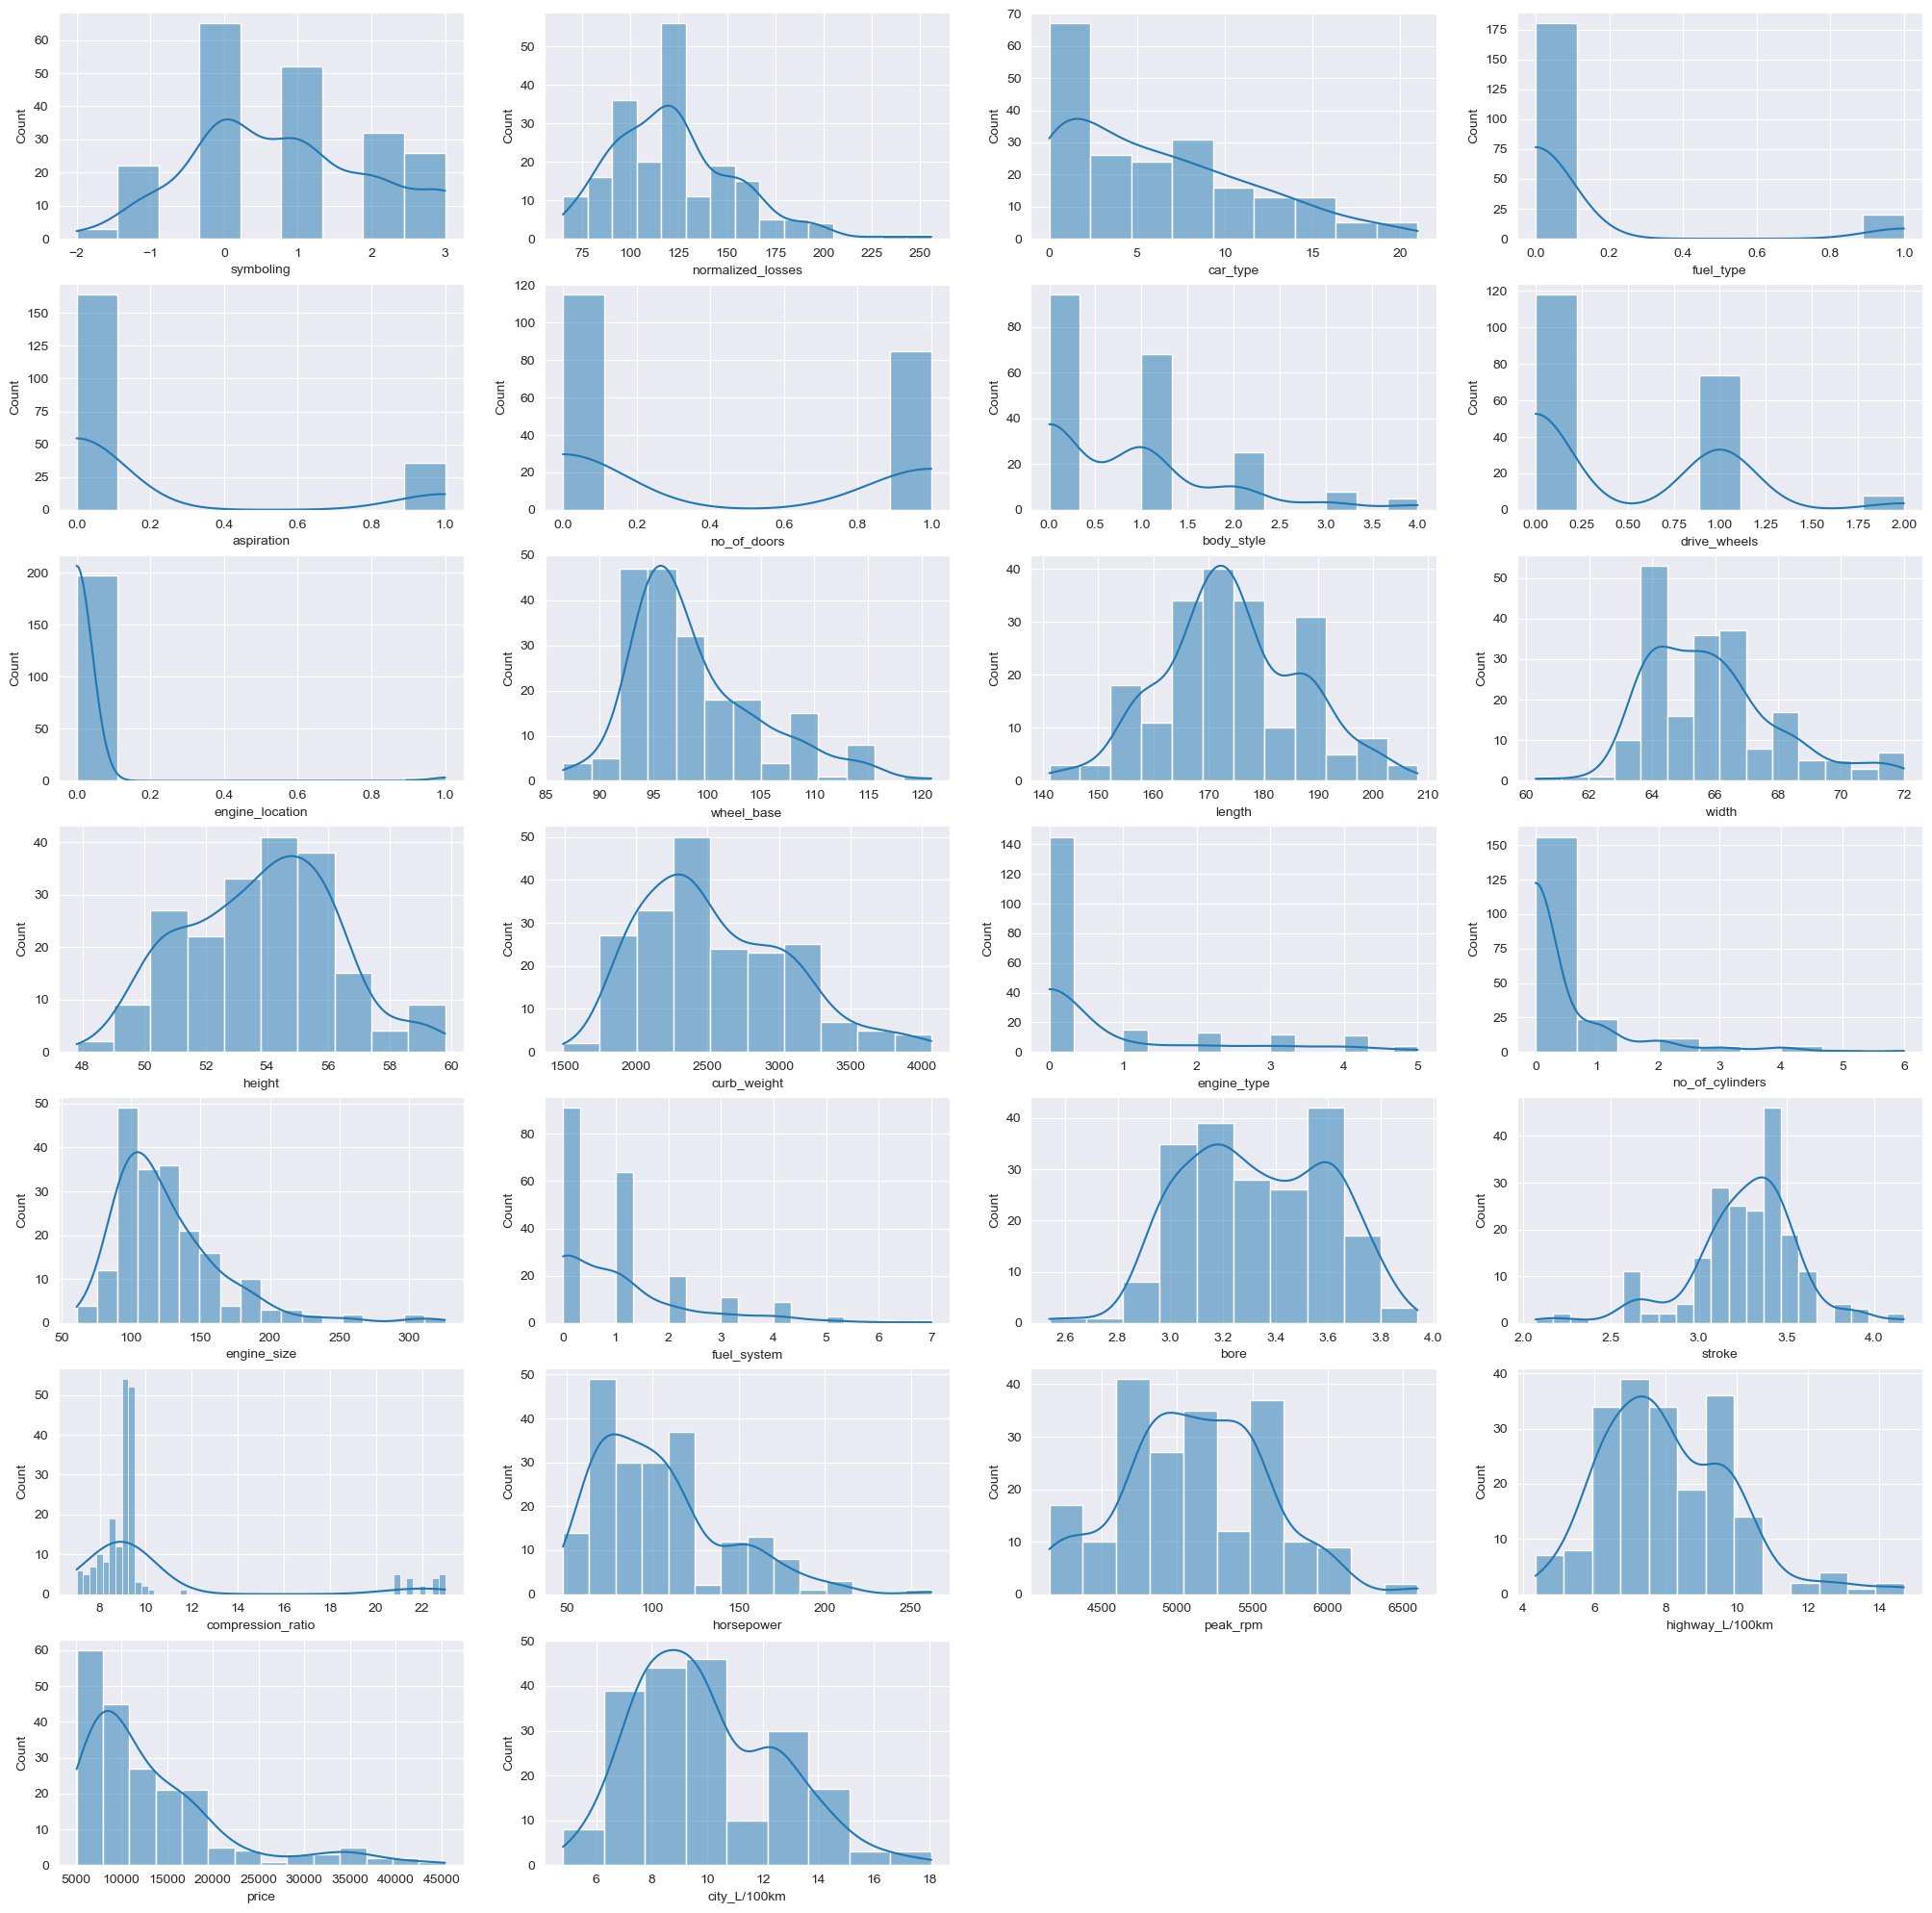

In [61]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
i=1
for col in df.columns:
    plt.subplot(7,4,i)
    sns.histplot(data=df,x=df[col],kde=True)
    i+=1
plt.show()

- gas is the fuel type used by many customers than the diesel
- about 500 have used std compared to turbo
- customers have preffered cars withs 4 doors than 2
- sedan and hatchback arepreffered more by the customers than the convertibles 
- fwd is the wheel type more likely to be used
- customers have preffered front engine than the rear ones
- like 160 peoples have used ohc engine types
- customers have bought cars mostly with four cylinders 
- mpfi and 2bbi fuel_system are more likely used by the customers

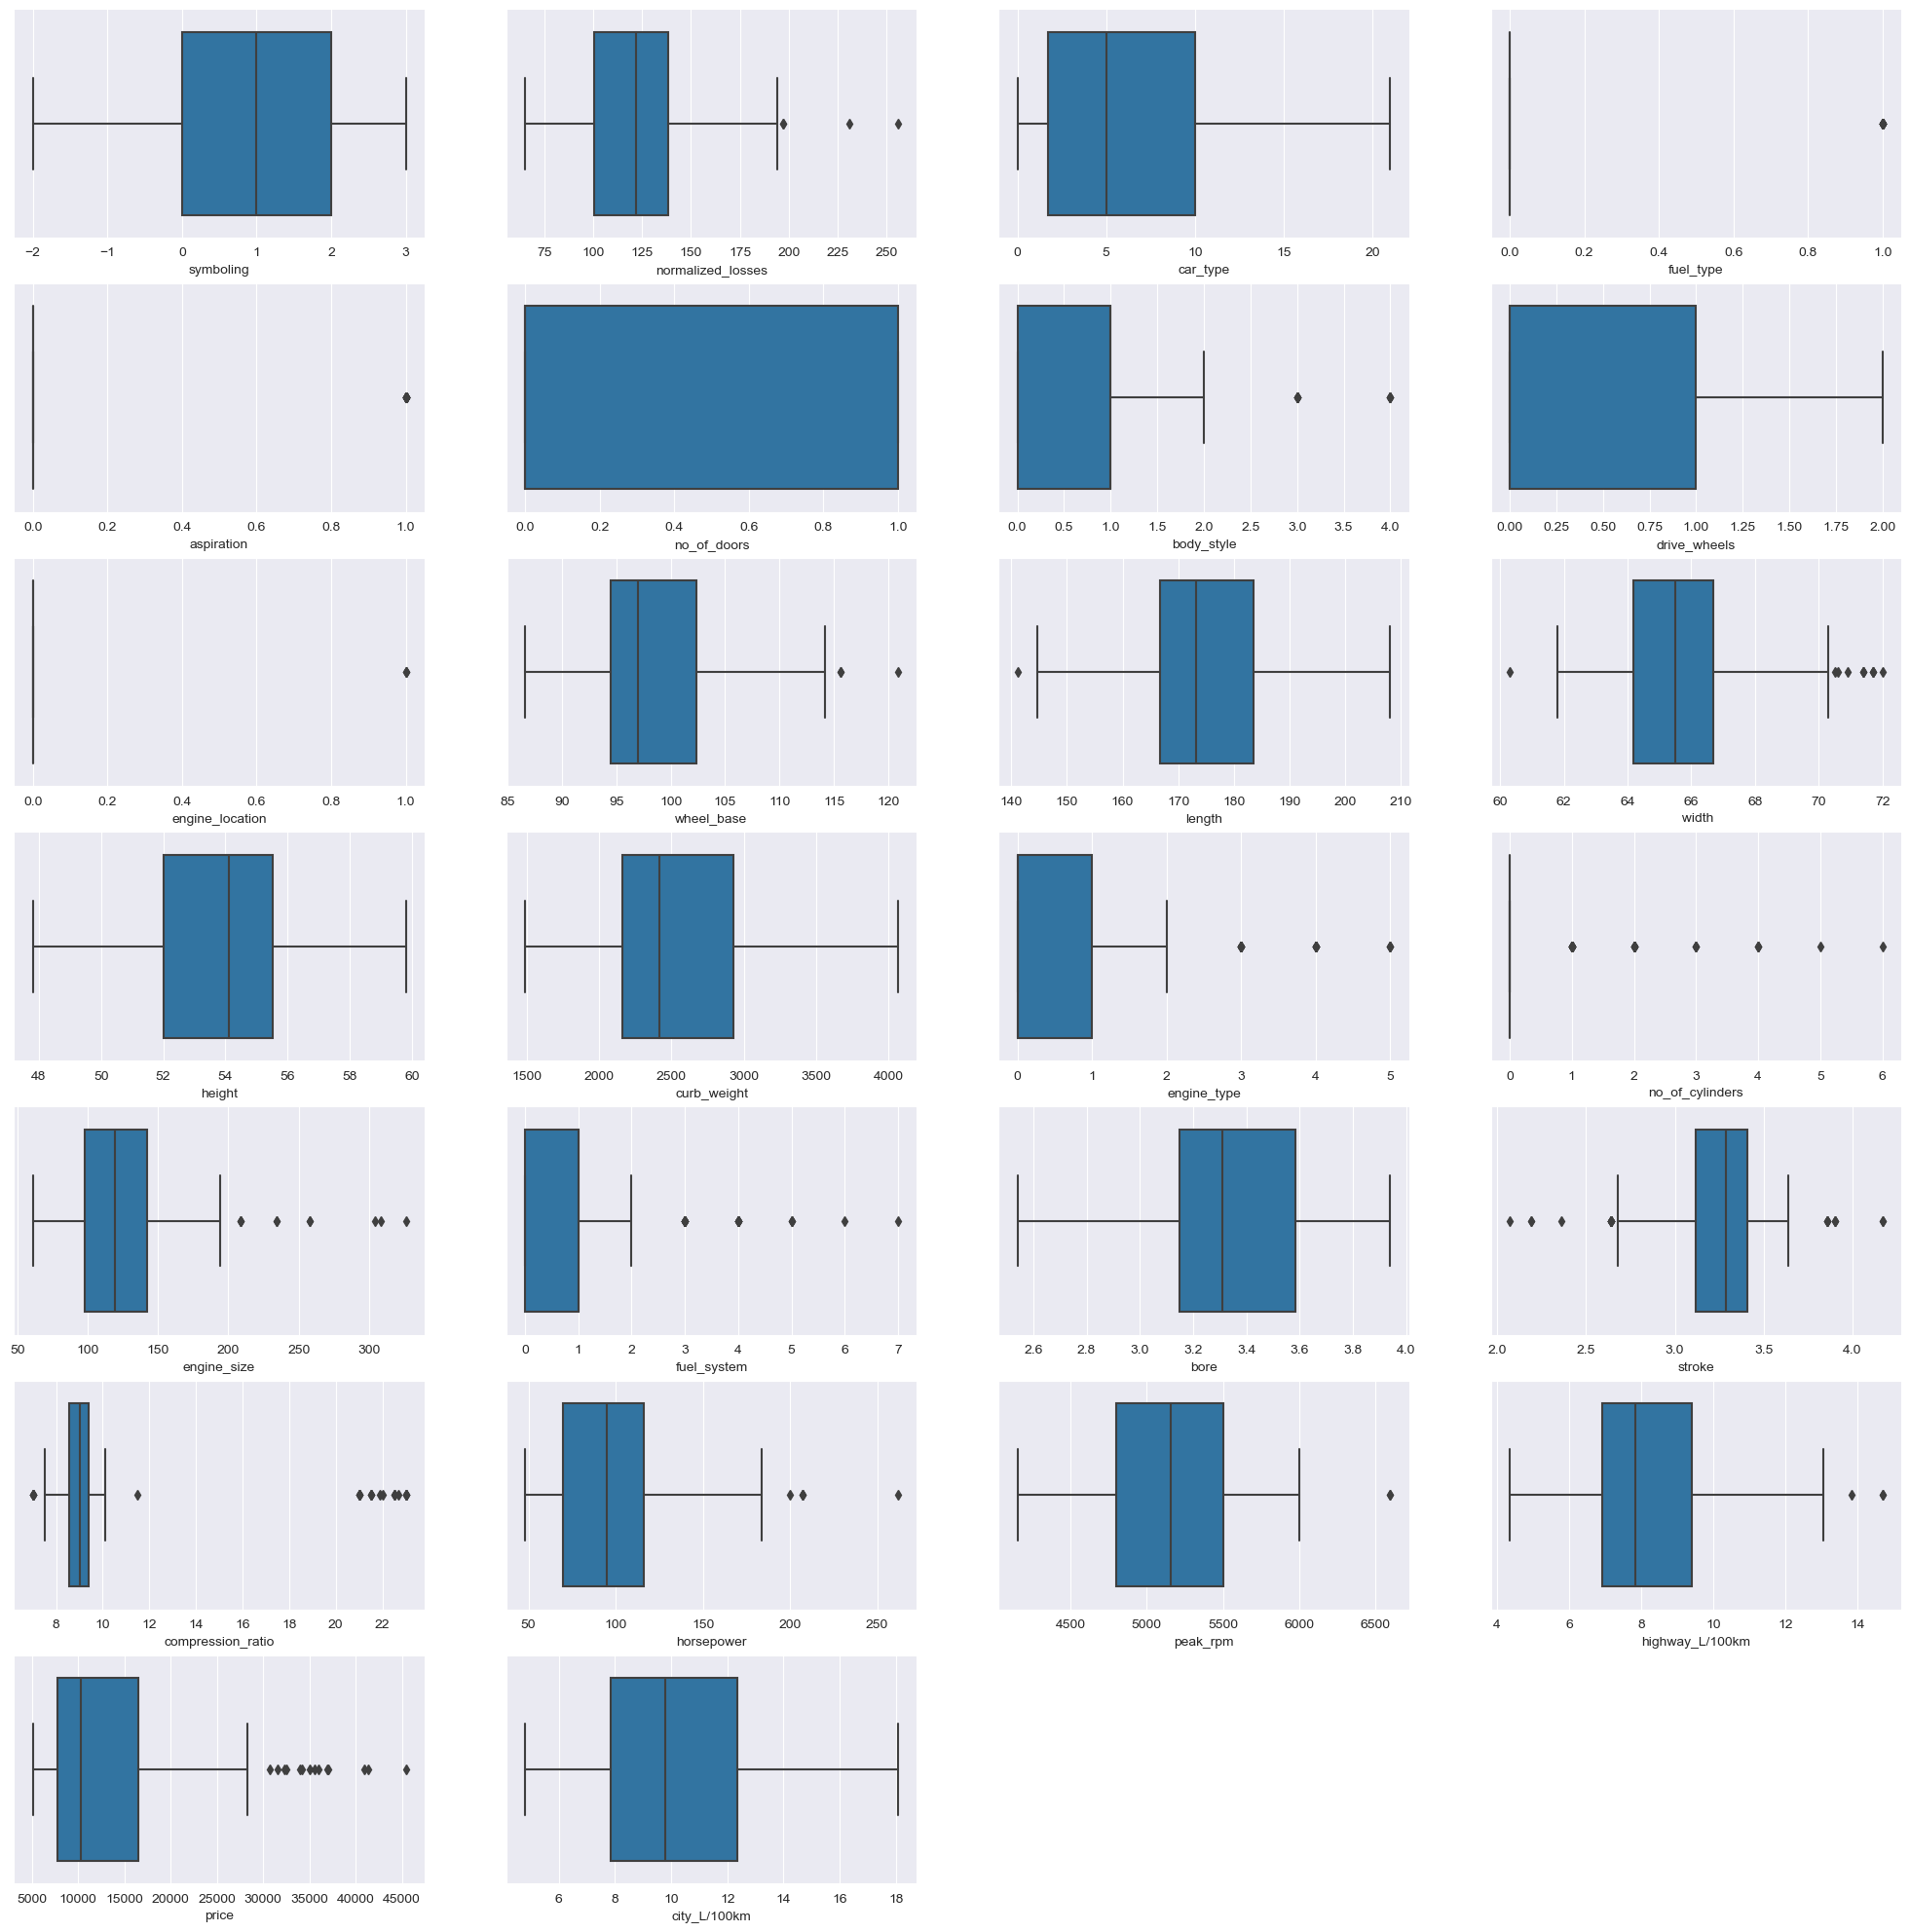

In [62]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
i=1
for col in df.columns:
    plt.subplot(7,4,i)
    sns.boxplot(data=df,x=df[col])
    i+=1
plt.show()

Most of the columns are affected by the outliers.

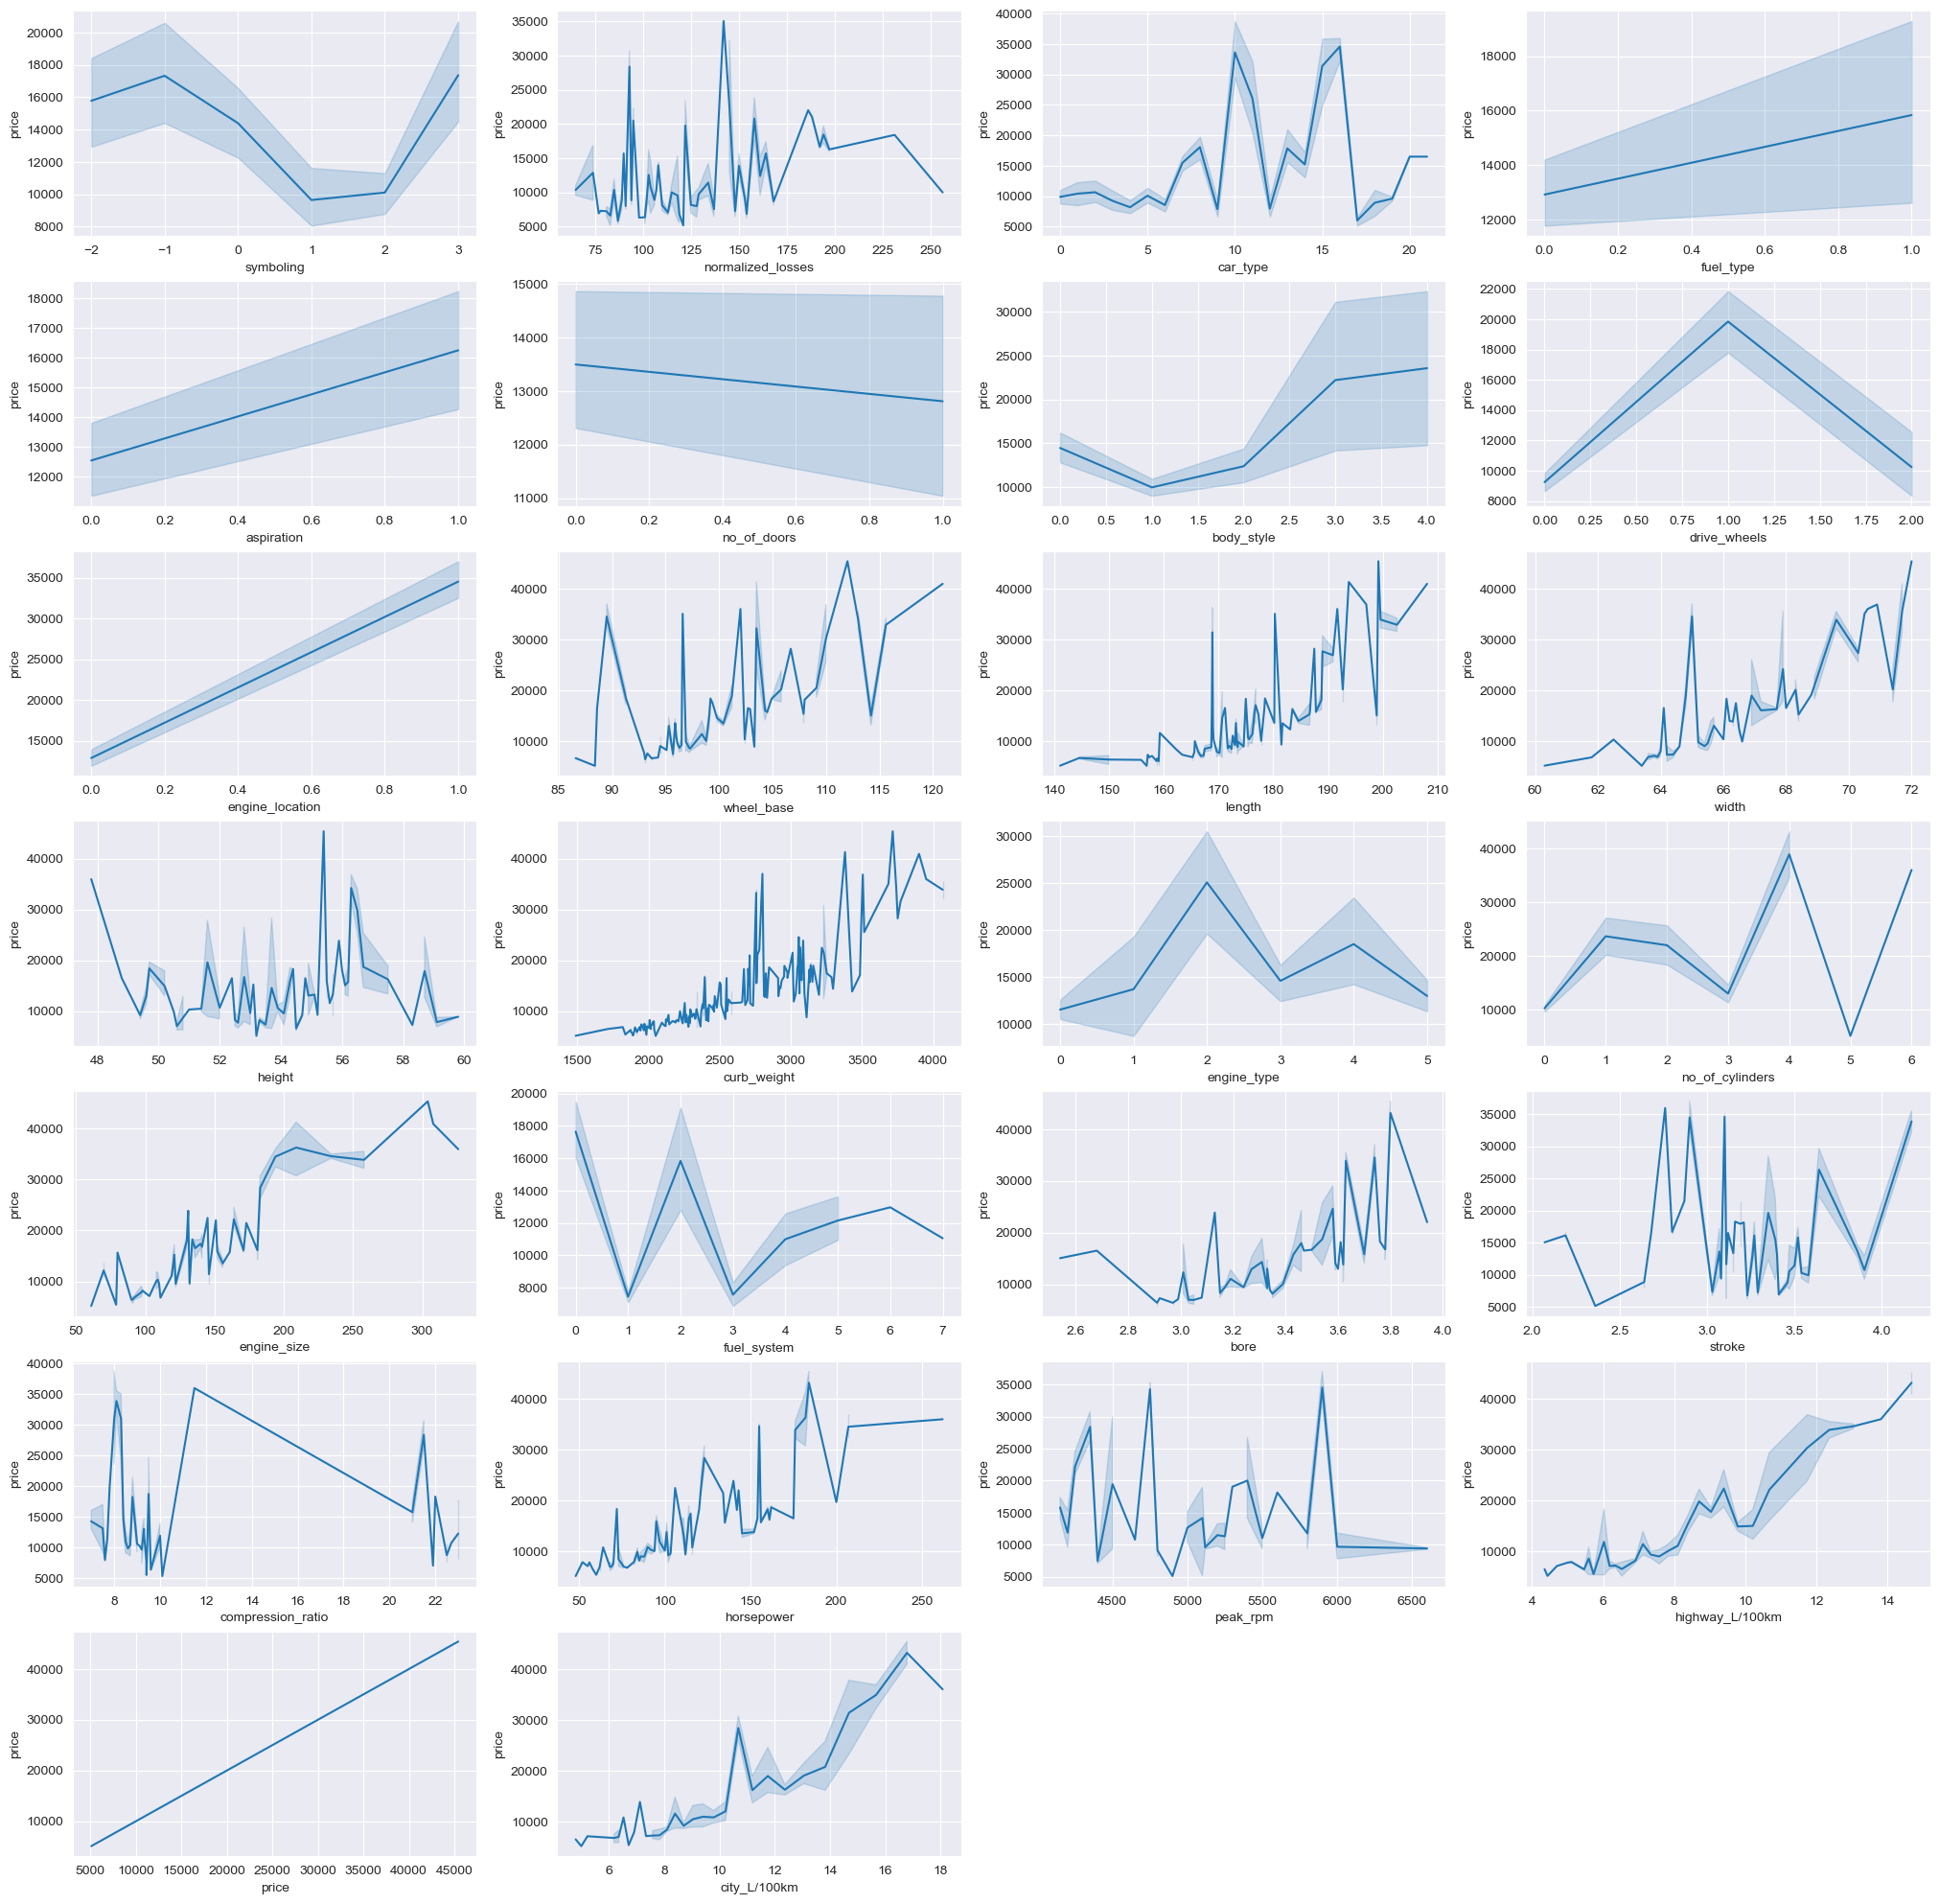

In [63]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
i=1
for col in df.columns:
    plt.subplot(7,4,i)
    sns.lineplot(data=df,x=df[col],y="price")
    i+=1
plt.show()

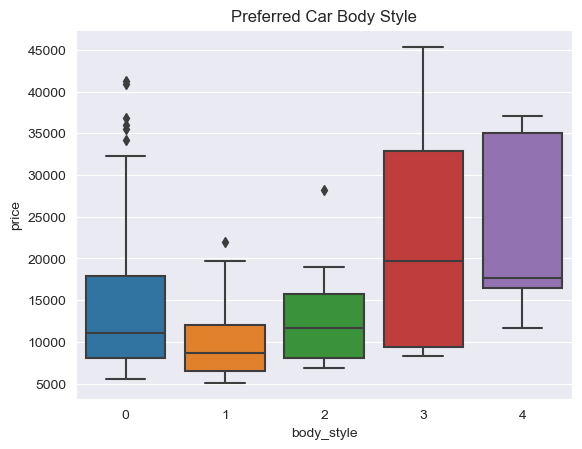

In [64]:
# Lets examine body_style and price ;

sns.boxplot(x="body_style",y="price",data=df)
plt.title("Preferred Car Body Style")
plt.show()

- 0 = "sedan",
- 1 = "hatchback",
- 2 = "wagon",
- 3 = "hardtop"
- 4 = "convertible"

We see that the distributions of price between the different body_style categories have a significant overlap and Cars with
"Sedan" are being manufactured at high ranfe by comparing to other body styles.

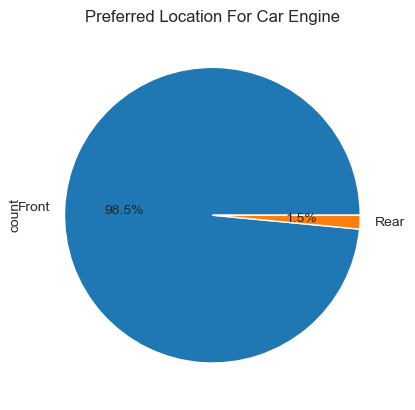

In [143]:
# Lets examine engine_location and price ;
df["engine_location"].value_counts().plot(kind="pie",autopct="%.1f%%",labels=["Front","Rear"])
plt.title("Preferred Location For Car Engine")
plt.show()

- 0 = "front",
- 1 = "rear"

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

And Most of the car manufacturers preferred to place engine in front side of cars.

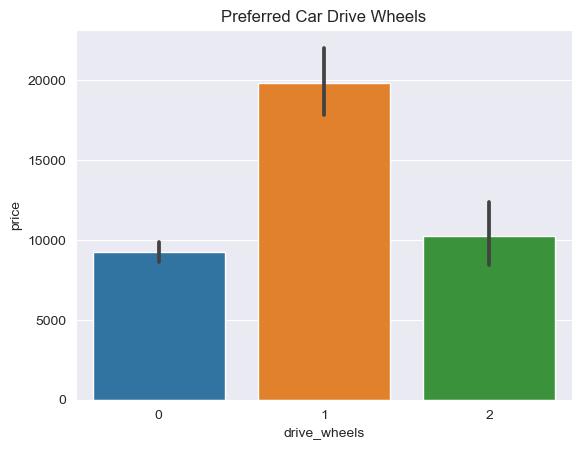

In [140]:
# Lets examine the drive_wheels and price;

sns.barplot(data=df,x="drive_wheels",y="price")
plt.title("Preferred Car Drive Wheels")
plt.show()

- 0 = "fwd",
- 1 = "rwd".
- 2 =  "4wd"

Here we see that the distribution of price between the different drive-wheels categories and we can see"rwd" drive_wheels 
cars are costlier by comparing to other drive wheels cars.

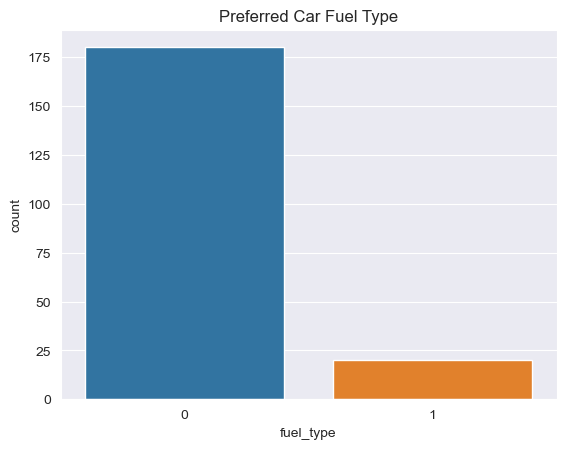

In [141]:
sns.countplot(x="fuel_type", data=df)
plt.xlabel='fuel_type' 
plt.ylabel='Count'
plt.title("Preferred Car Fuel Type")
plt.show()

- 0 ="gas",
- 1="diesel"

To check which "fuel_type" is mostly used for People,

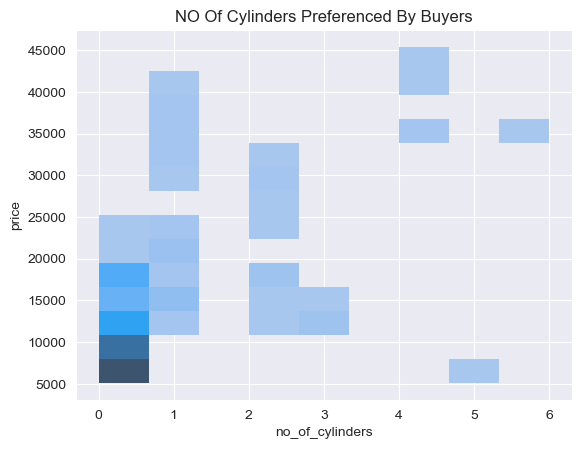

In [142]:
sns.histplot(data=df,x="no_of_cylinders",y="price")
plt.title("NO Of Cylinders Preferenced By Buyers")
plt.show()

- "four"= 0
- 'six'= 1 
-  'five'= 2 
- 'two'= 3
- 'eight'= 4
- 'three'= 5 
- 'twelve'= 6

Car with four Cylinders are being manufactured at high range by comparing to other no of cylinders.

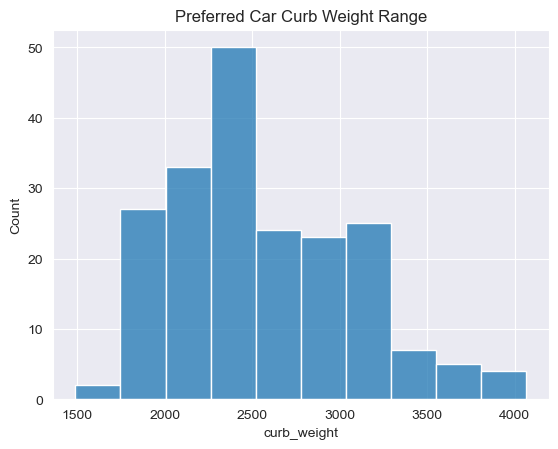

In [69]:
sns.histplot(data=df,x="curb_weight")
plt.title("Preferred Car Curb Weight Range")
plt.show()

Most of the Cars has Curb weight is in range 2000 to 2500.

<Figure size 2000x500 with 0 Axes>

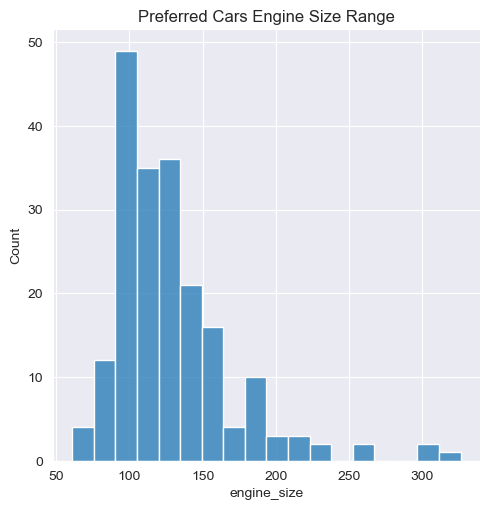

In [70]:
plt.figure(figsize=(20,5))
sns.displot(df["engine_size"])
plt.title("Preferred Cars Engine Size Range")
plt.show()

Most of the Cars have and Engine Size in range of 90 to 120

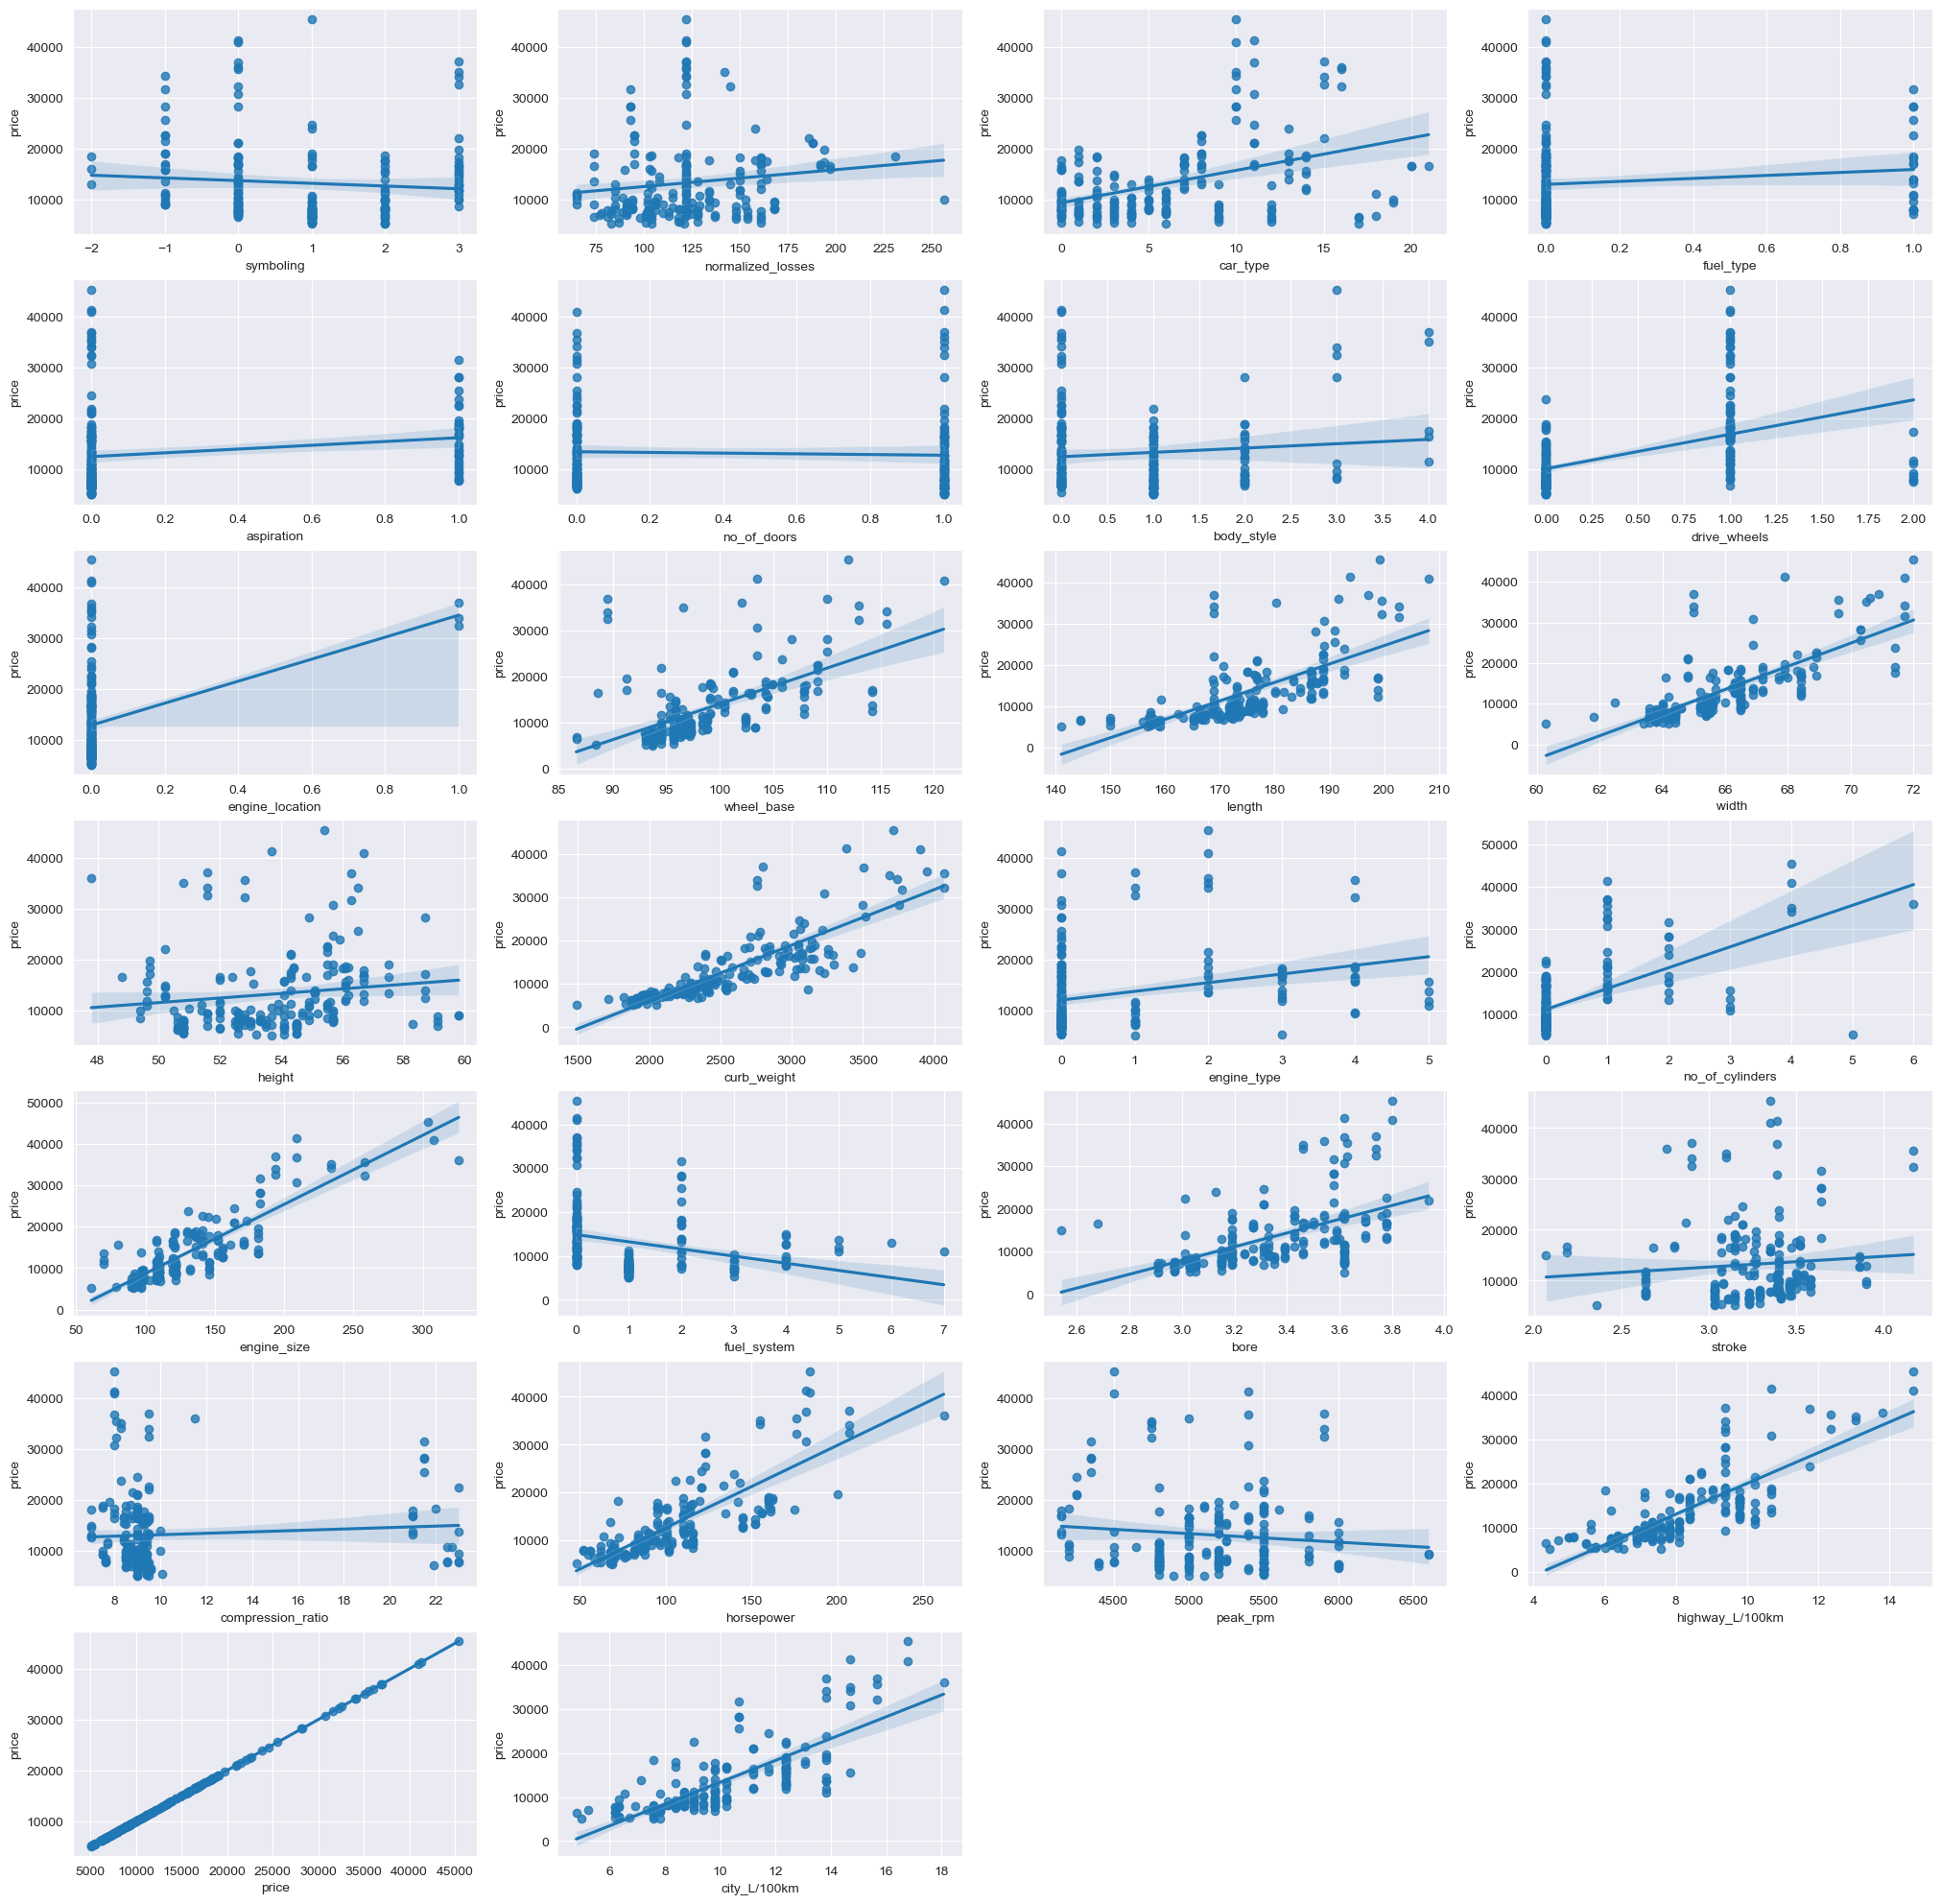

In [71]:
plt.figure(figsize=(25,25))
sns.set_style("darkgrid")
i=1
for col in df.columns:
    plt.subplot(7,4,i)
    sns.regplot(data=df,x=df[col],y="price")
    i+=1
plt.show()

- As the engine-size goes up, the price goes up: This indicates a positive direct correlation between these two variables.Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

- Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal.Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore,it's not a reliable variable.

- As highway_L/100km  goes up, the price goes up as well: a positive direct correlation between these two variables.Highway mpg could potentially be a predictor of price.

- There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.

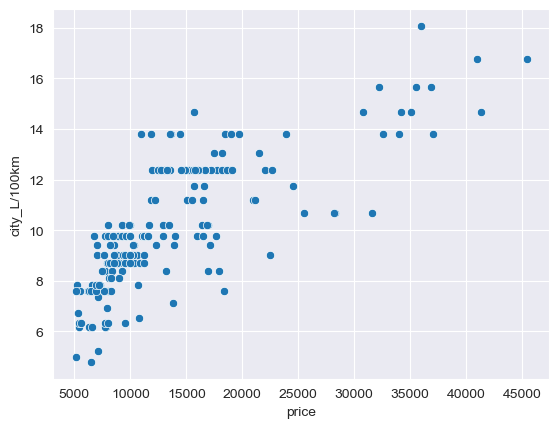

In [138]:
sns.scatterplot(data=df,x ="price",y="city_L/100km")
plt.show()

Cars in the range of 5000 to 10000 are preferrable in City to ride as they are more preferrable coz they provide good L/100km.

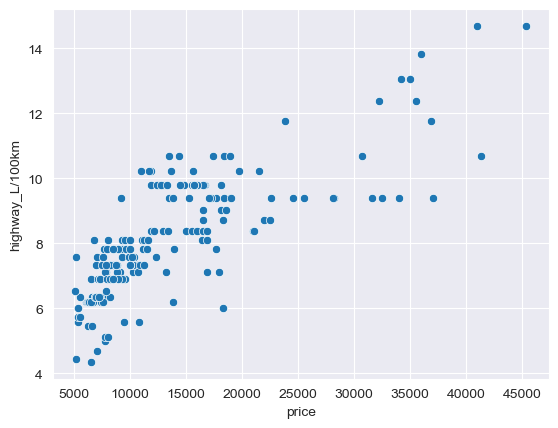

In [139]:
sns.scatterplot(data=df,x ="price",y="highway_L/100km")
plt.show()

Expensive cars are not much preferred on highway duo to their low highway_L/100km.

In [74]:
# Analysing Individual Feature Pattern;
# => What are the main characteristics that have the most impact on the car price?

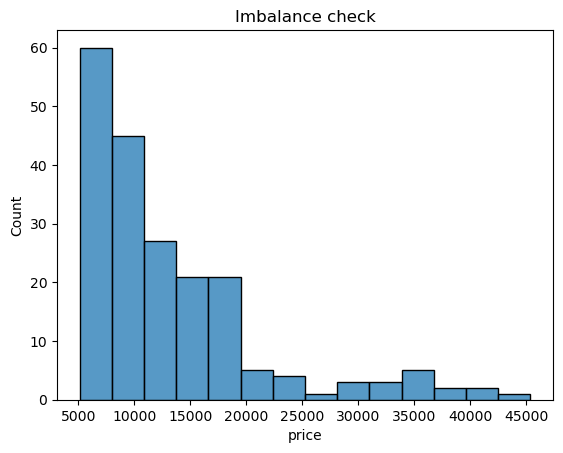

In [64]:
# Check whether the given data is imbalance or not;

sns.histplot(df["price"])
plt.xlabel='price' 
plt.ylabel='Count'
plt.title("Imbalance check")
plt.show()

From aboce graph, we can say that most of cars are in price range of 5000 t0 13000.

*Outlier Detection:*
-----------

In [65]:
# Function to detect outliers percentage using IQR;

def cal_out_percentage(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    
    outliers = ( (column <(q1-1.5*IQR))  | (column >(q3+1.5*IQR)) )
    outlier_percentaege = (outliers.sum()/len(column))*100
    return outlier_percentaege
outlier_percentage = df.apply(cal_out_percentage)
print(outlier_percentage)

symboling             0.0
normalized_losses     2.0
car_type              0.0
fuel_type            10.0
aspiration           18.0
no_of_doors           0.0
body_style            6.5
drive_wheels          0.0
engine_location       1.5
wheel_base            1.5
length                0.5
 width                5.5
height                0.0
curb_weight           0.0
engine_type          13.5
no_of_cylinders      22.0
engine_size           5.0
fuel_system          12.5
bore                  0.0
stroke               12.0
compression_ratio    13.5
horsepower            2.5
peak_rpm              1.0
highway_L/100km       1.5
price                 7.0
city_L/100km          0.0
dtype: float64


*Splitting the dataset into train,test and validation :*
---------

In [66]:
# split the dataset into train,test and validation sets;

from sklearn.model_selection import train_test_split
x = df.drop(["price"],axis=1)
y = df.price

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                train_size=0.8,
                                                random_state=42)                                             

In [68]:
len(x),len(y)

(200, 200)

In [69]:
x_train.shape,x_test.shape

((160, 25), (40, 25))

*Feature Engineering:*
--------------------

<Axes: >

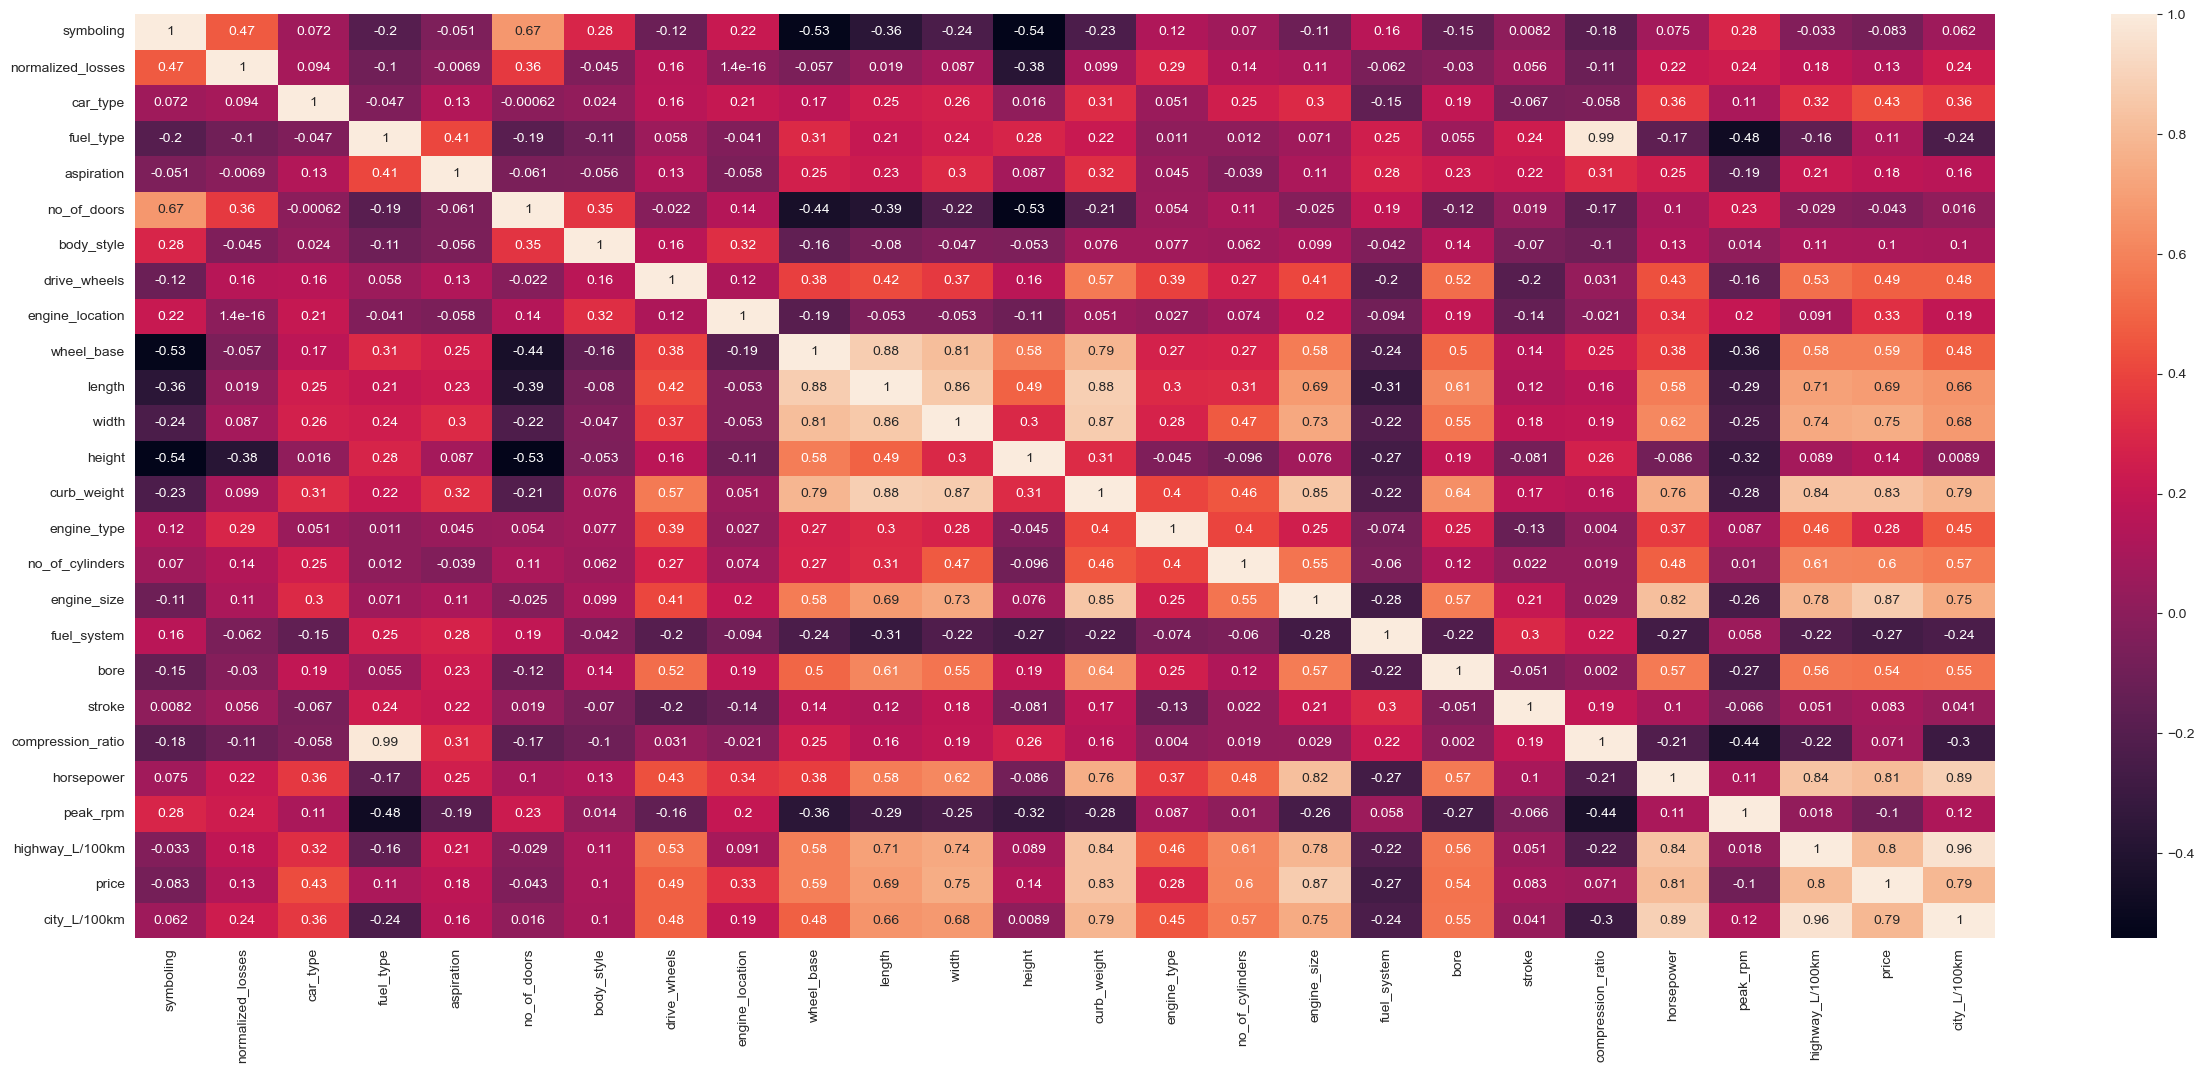

In [82]:
plt.figure(figsize=(30,12))
sns.set_style("darkgrid")
sns.heatmap(data=df.corr(),annot=True)

Some of the numeric variables that price is highly correlated with (correlation > +0.5 or correlation < -0.5) are:
wheel_base,length,width,curb_weight,engine_size,bore,horsepower,city_L/100km & highway_L/100km,compression_ratio.

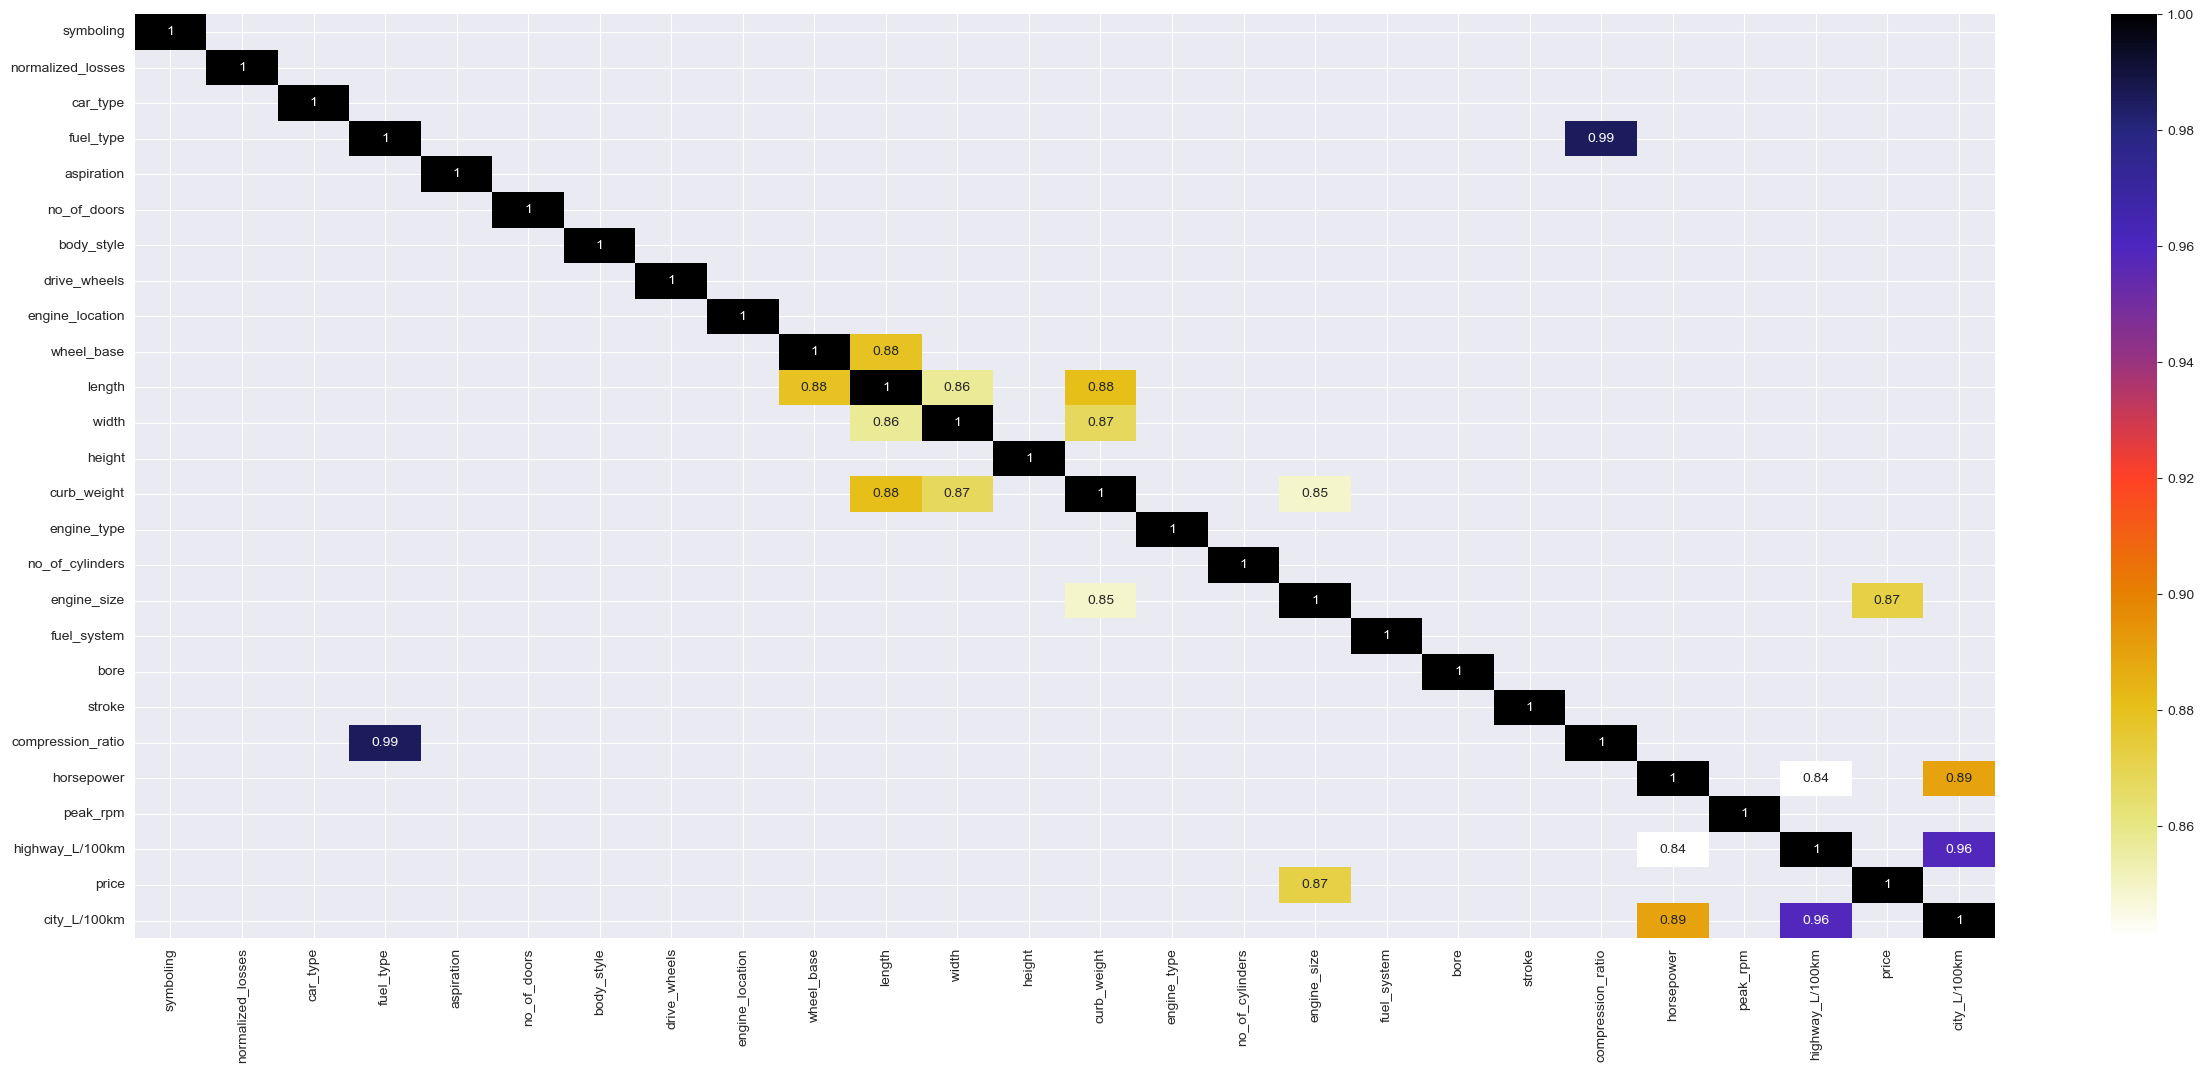

In [83]:
plt.figure(figsize=(30,12))
sns.set_style("darkgrid")
corr = df.corr()
sns.heatmap(corr[(corr>0.84) | (corr<-0.84)],annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

These above columns are highly correlated with target columns ,so we can to remove the columns from given data.

*Data Cleaning:*
-------

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleaning may be performed interactively with data wrangling tools, or as batch processing through scripting.

The first step would be to convert all Categorical features to Numerical features, else the machine learning algorithm won't be able to directly take in those features as inputs.

With the following function we can select highly correlated features it will remove the first features that 
is correlated with anything other features.

In [70]:
def correlation(dataset,threshold):
    col_corr=set()                                   # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # we are interested in absolute coeff value,
                colname = corr_matrix.columns[i]     # getting the name of columns
                col_corr.add(colname)
    return col_corr

In [74]:
corr_features = correlation(x_train,0.85)
len(set(corr_features))

4

In [75]:
pd.DataFrame(corr_features)

,0
0,length
1,compression_ratio
2,city_L/100km
3,curb_weight


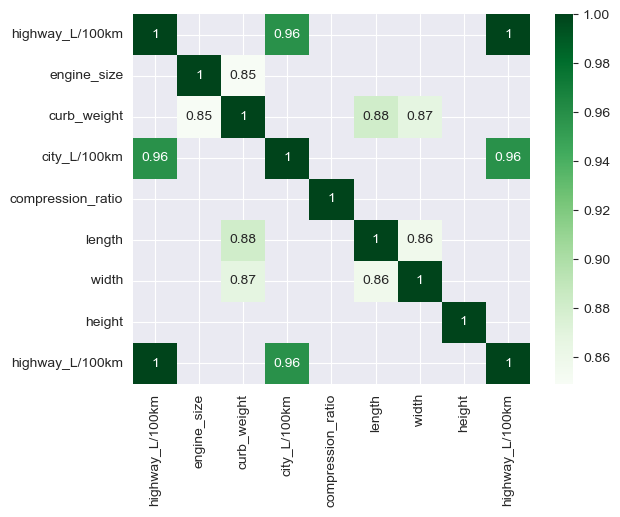

In [76]:
n = df[["highway_L/100km","engine_size","curb_weight","city_L/100km","compression_ratio",'length', ' width',
        'height',"highway_L/100km"]].corr()
sns.set_style("darkgrid")
sns.heatmap(n[(n>0.84) | (n<-0.84)],annot=True,cmap="Greens")
plt.show()

In [77]:
df[["engine_size","price"]].corr()

,engine_size,price
engine_size,1.000000,0.872337
price,0.872337,1.000000


In [78]:
df["engine_size"].isnull().sum()/len(df)*100
# How much data have been missed in this particular columns

0.0

In [80]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [81]:
# scaling;

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtr_scaled = scaler.fit_transform(x_train)
xte_scaled = scaler.transform(x_test)

*Regression Evaluation Metrics:*
-------
*Here are the common evaluation metrics for regression problems*,

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors
- Mean Squared Error (MSE) is the mean of the squared errors
- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
- R-squared (R2) indicates the percentage of the variance in the dependent variable that the independent variables explain collectively

*Comparing these metrics:*

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

*R-Squared could be interpreted*

- 0 : doesn't fit the data
- 1 : better fit for the data
- -1 : due to overfitting of data

All of these are loss functions, because we want to minimize them

*LR Model:*
----------
*Linear regression assumptions:*
- There is a linear relationship between dependent variable and the coefficients of the independent variables.Measurement error is independent and random. Technically, we say that the error is independent identically distributed, or iid.Errors arise from the dependent variable only.

- There is no multicollinearity*. In other words, there is no significant correlation between the independent variables.Residuals are homoskedastic (constant variance). In other words, the errors are the same across all groups of independent variables.

- Earlier, we looked at the correlation between all the numeric features and price. We did notice here that there is multicollinearity or that some features are significantly correlated amongst themselves, negating one of the assumptions of linear regression. However, for the purposes of our exercise, we will be continuing with linear modelling with all features without delving into why these might be correlated.

- Our initial guess is that some or all of these are highly relevant in predicting price and should be part of the model

In [83]:
# Using Linear Regression;

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtr_scaled,y_train)

LinearRegression()

In [84]:
lrte_pred = lr_model.predict(xte_scaled)
lrtr_pred = lr_model.predict(xtr_scaled)

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("LINEAR_TESTING_SCORES:\n===========================")
print("LR_R2_SCORE:",r2_score(y_test,lrte_pred))
print("LR_MSE:",mean_squared_error(y_test,lrte_pred))
print("LR_MAE:",mean_absolute_error(y_test,lrte_pred))

LINEAR_TESTING_SCORES:
LR_R2_SCORE: 0.8786472402056581
LR_MSE: 13597358.83629174
LR_MAE: 2521.7142343050064


In [86]:
print("LINEAR_TRAINING_SCORES:\n===========================")
print("LR_R2_SCORE:",r2_score(y_train,lrtr_pred))
print("LR_MSE:",mean_squared_error(y_train,lrtr_pred))
print("LR_MAE:",mean_absolute_error(y_train,lrtr_pred))

LINEAR_TRAINING_SCORES:
LR_R2_SCORE: 0.8838211101581248
LR_MSE: 5823450.080790966
LR_MAE: 1779.1620064726696


- It is Used to determine the linear relationship between the dependent variable (y) and independent variable (x).
- This linear relationship is represented by a straight line called regression line / best-fit line.
- This line is the pattern on which the machine has learned from the data.
- r2 give 0.87 score on testing data ,r2 gives 0.88 scores on training data,its is a good model mmthis model gives low bias and low variance,it performs well.

*SVR Model :*
----------
- SVR is a type of regression algorithm that utilizes support vector to model that relationship between input features and  target values.In this example , we used the Radial Basis Function (RBF) kernal wiht specific parameters like "c","gamma",and "spsilon".

- "In this project, Support Vector Regression (SVR) has emerged as a powerful tool for predicting and understanding complex relationships within the dataset. SVR, being a non-linear regression technique, excels in capturing intricate patterns that might be challenging for linear models. The kernel trick employed in SVR allows it to map the data into higher-dimensional spaces, revealing nuanced dependencies.

- The success of SVR in this project is evident through [insert relevant metric or score], highlighting its ability to effectively model the target variable. The model's performance is particularly noteworthy in scenarios where the relationship between features and the target is non-linear or exhibits non-trivial patterns.

- While celebrating the achievements of SVR, it's essential to acknowledge potential considerations. Exploring the impact of kernel choices, optimizing hyperparameters, or assessing generalizability to new data could be areas for further investigation. Overall, the utilization of Support Vector Regression has proven invaluable in this project, providing a robust framework for capturing and predicting intricate patterns within the data."

In [87]:
# Using Support Vector Regressor Model;

from sklearn.svm import SVR
svr_model = SVR()
params_grid = {"kernel":["linear","poly","rbf"],
              "C":[0.1,1,10],
              "epsilon":[0.01,0.1,0.2]}

In [88]:
# Perform  the gird search with Cross_validation;

from sklearn.model_selection import GridSearchCV
svr_grid = GridSearchCV(estimator = svr_model,
                        param_grid = params_grid,
                        scoring="neg_mean_squared_error",
                        n_jobs = -1,
                        refit = True,
                        cv=3,
                        verbose=2)

In [89]:
svr_grid.fit(x,y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [90]:
svr_grid.best_params_

{'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}

In [91]:
# Get the best parametrs;
best_svr = SVR(C = 10,
               epsilon = 0.01, 
               kernel= 'linear')
best_svr.fit(x_train,y_train)

SVR(C=10, epsilon=0.01, kernel='linear')

In [92]:
svrte_pred = best_svr.predict(x_test)
svrtr_pred = best_svr.predict(x_train)

In [93]:
print("SUPPORT VECTOR REGRESSOR TESTING MODEL:\n======================================")
print("SVR_r2_SCORE:",r2_score(y_test,svrte_pred))
print("SVR_MSE:",mean_squared_error(y_test,svrte_pred))
print("SVR_MAE:",mean_absolute_error(y_test,svrte_pred))

SUPPORT VECTOR REGRESSOR TESTING MODEL:
SVR_r2_SCORE: 0.842739926961988
SVR_MSE: 17620708.810769014
SVR_MAE: 2823.5672182547314


In [94]:
print("SUPPORT VECTOR REGRESSOR TRAINING MODEL:\n======================================")
print("SVR_r2_SCORE:",r2_score(y_train,svrtr_pred))
print("SVR_MSE:",mean_squared_error(y_train,svrtr_pred))
print("SVR_MAE:",mean_absolute_error(y_train,svrtr_pred))

SUPPORT VECTOR REGRESSOR TRAINING MODEL:
SVR_r2_SCORE: 0.7997286437662682
SVR_MSE: 10038572.818407794
SVR_MAE: 2036.7127775400502


*SVR_conclusion:*
----------
- SVR (R2 score = 0.84): Displays decent predictive ability, capturing complex patterns in the data.

- The conclution of the analysis using Support Vector Regressor (SVR) .The Obtained r2_score=0.84,reflects a strong performance of the model in explanning the variance within the data.This substantial score suggests that the SVR model effectively captures underlying pattern and trends,contributing to its predictive capability.It's noteworthly that an r2 score of 0.84 indicates a high proportion of variability in the target variable has been accounted by the model.

- For instances,assessing the generalizability of the model to new ,unseen data or understanding the impact of outliers on the model's performance could be areas for further investigation.Neverthless,the achieved r2_score of 0.84 serves as a strong validation of the SVR's effectiveness in this sepcific context.

*RFR Model:*
---------------
- For our project utilizing Random Forest Regression, consider crafting a description that highlights its strengths and contributions. Here's a sample description:

- "In this project, the implementation of Random Forest Regression has proven to be instrumental in achieving accurate and robust predictions. The ensemble nature of the Random Forest model, combining multiple decision trees, enhances its ability to capture complex relationships within the data. The flexibility and resilience of Random Forest Regression make it well-suited for handling various types of features and mitigating overfitting.

- The model's performance, as evidenced by [insert relevant metric or score], underscores its efficacy in understanding and predicting the target variable. Furthermore, the built-in feature importance analysis of Random Forest provides valuable insights into the significant factors influencing the predictions.

- Despite its success, it's crucial to consider potential limitations and areas for refinement. Exploring hyperparameter tuning or assessing the model's performance on unseen data could be avenues for further improvement. Overall, the implementation of Random Forest Regression stands as a key component in achieving accurate and reliable predictions in this project."

In [96]:
# Using random forest regressor model;

from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [97]:
rfrte_pred = rfr_model.predict(x_test)
rfrtr_pred = rfr_model.predict(x_train)

In [98]:
print("RANDOM FOREST REGRESSOR TESTING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_test,rfrte_pred))
print("RFR_MSE:",mean_squared_error(y_test,rfrte_pred))
print("RFR_MAE:",mean_absolute_error(y_test,rfrte_pred))

RANDOM FOREST REGRESSOR TESTING MODEL:
RFR_r2_SCORE: 0.9684654556318477
RFR_MSE: 3533389.073634575
RFR_MAE: 1471.9438994047619


In [99]:
print("RANDOM FOREST REGRESSOR TRAINING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_train,rfrtr_pred))
print("RFR_MSE:",mean_squared_error(y_train,rfrtr_pred))
print("RFR_MAE:",mean_absolute_error(y_train,rfrtr_pred))

RANDOM FOREST REGRESSOR TRAINING MODEL:
RFR_r2_SCORE: 0.9815420012231666
RFR_MSE: 925204.5239413794
RFR_MAE: 639.7315224702381


*RFR Hyper parameter tunning :*

In [102]:
# Randomized Search CV;

maxdep = list(range(2,15))
maxdep.append(None)
Params = {
    "n_estimators":[10,20,30,40,50,75],
    "criterion":["squared_error", "absolute_error","friedman_mse"],
    "max_depth":maxdep,
    "min_samples_split":list(range(1,7)),
    "min_samples_leaf":list(range(1,7)),
    "max_features":["sqrt", "log2", None], 
    "bootstrap":[True, False]
}

In [103]:
from sklearn.model_selection import RandomizedSearchCV
rfr1_model = RandomForestRegressor(random_state = 42)
rdsv = RandomizedSearchCV(estimator=rfr1_model,param_distributions=Params,
                         scoring="f1_weighted",n_jobs=-1,refit=True,
                          cv=3,verbose=2,n_iter=100,random_state=42)



In [104]:
rdsv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50,
                                                         75]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [105]:
 rdsv.best_params_

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [106]:
rfr_model = RandomForestRegressor(n_estimators = 40,
                                  min_samples_split = 5,
                                  min_samples_leaf=1,
                                  max_features="log2",
                                  max_depth=12,
                                  criterion="absolute_error",
                                  bootstrap=True
                )

In [107]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=12,
                      max_features='log2', min_samples_split=5,
                      n_estimators=40)

In [108]:
rfrhypte_pred = rfr_model.predict(x_test)
rfrhyptr_pred = rfr_model.predict(x_train)

In [109]:
print("RANDOM FOREST REGRESSOR TESTING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_test,rfrhypte_pred))
print("RFR_MSEE:",mean_squared_error(y_test,rfrhypte_pred))
print("RFR_MAE:",mean_absolute_error(y_test,rfrhypte_pred))

RANDOM FOREST REGRESSOR TESTING MODEL:
RFR_r2_SCORE: 0.9223212333957008
RFR_MSEE: 8703766.319523437
RFR_MAE: 1963.60625


In [110]:
print("RANDOM FOREST REGRESSOR TRAINING MODEL:\n=====================================")
print("RFR_r2_SCORE",r2_score(y_train,rfrhyptr_pred))
print("RFR_MSE:",mean_squared_error(y_train,rfrhyptr_pred))
print("RFR_MAE:",mean_absolute_error(y_train,rfrhyptr_pred))

RANDOM FOREST REGRESSOR TRAINING MODEL:
RFR_r2_SCORE 0.9515374757127619
RFR_MSE: 2429177.033452149
RFR_MAE: 984.1228906250001


Random Forest Regression without Hyper Parameter Tunning (R2 score = 0.96)

*GBR Model :*
----------
Gradient Boosting Regression is a powerful machine learning technique for regression tasks. It works by sequentially fitting weak learners, usually decision trees, to the residuals of the previous predictions, gradually improving the model's accuracy.

This iterative process combines the strengths of multiple weak models, creating a robust ensemble that excels in capturing complex relationships within the data. In your project, implementing Gradient Boosting Regression can enhance predictive performance and handle non-linear patterns effectively.

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [113]:
gbrte_pred = gbr.predict(x_test)
gbrtr_pred = gbr.predict(x_train)

In [114]:
print("GRADIENT BOOSTING REGRESSOR TESTING MODEL:\n========================================")
print("GBR_r2_score:",r2_score(y_test,gbrte_pred))
print("GBR_MSE:",mean_squared_error(y_test,gbrte_pred))
print("GBR_MAE:",mean_absolute_error(y_test,gbrte_pred))

GRADIENT BOOSTING REGRESSOR TESTING MODEL:
GBR_r2_score: 0.963643151294837
GBR_MSE: 4073719.615760392
GBR_MAE: 1483.305617631299


In [115]:
print("GRADIENT BOOSTING REGRESSOR TRAINING MODEL:\n========================================")
print("GBR_r2_score:",r2_score(y_train,gbrtr_pred))
print("GBRTE_MSE:",mean_squared_error(y_train,gbrtr_pred))
print("GBRTE_MAE:",mean_absolute_error(y_train,gbrtr_pred))

GRADIENT BOOSTING REGRESSOR TRAINING MODEL:
GBR_r2_score: 0.9878968367372503
GBRTE_MSE: 606669.3112338738
GBRTE_MAE: 587.4664476026572


Gradient Boosting Regression (R2 score = 0.96)

*XGBR  MODEL :*
-------------
XGBoost (Extreme Gradient Boosting) Regression is an advanced variation of Gradient Boosting Regression, known for its efficiency and high performance. 

It incorporates regularization techniques and parallel processing to optimize the boosting process, resulting in faster training and improved accuracy. XGBoost excels in handling large datasets, providing feature importance insights, and offering customizable parameters for fine-tuning. 

In our regressor project, leveraging XGBoost can enhance predictive capabilities and contribute to achieving superior regression results.

In [117]:
from xgboost import XGBRegressor
xgbr_model = XGBRegressor()
xgbr_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
xgbrte_pred = xgbr_model.predict(x_test)
xgbrtr_pred = xgbr_model.predict(x_train)

In [119]:
print("XGBOOST REGRESSOR TESTING MODEL:\n==================================")
print("XGB_R2_SCORE:",r2_score(y_test,xgbrte_pred))
print("XGB_MSE:",mean_squared_error(y_test,xgbrte_pred))
print("XGB_MAE:",mean_absolute_error(y_test,xgbrte_pred))

XGBOOST REGRESSOR TESTING MODEL:
XGB_R2_SCORE: 0.9336732313124065
XGB_MSE: 7431795.33638407
XGB_MAE: 1921.2111083984375


In [120]:
print("XGBOOST REGRESSOR TRAINING MODEL:\n==================================")
print("XGB_R2_SCORE:",r2_score(y_train,xgbrtr_pred))
print("XGB_MSE:",mean_squared_error(y_train,xgbrtr_pred))
print("XGB_MAE:",mean_absolute_error(y_train,xgbrtr_pred))

XGBOOST REGRESSOR TRAINING MODEL:
XGB_R2_SCORE: 0.9955570473825809
XGB_MSE: 222702.3585272193
XGB_MAE: 176.9963623046875


XGBoost Regression (R2 score = 0.93)

*DTR MODEL:*
---------
Decision Tree Regression is a versatile machine learning algorithm for regression tasks. It works by recursively partitioning the dataset into subsets based on feature conditions, creating a tree structure.

Each leaf node in the tree represents a predicted output value. Decision trees excel at capturing non-linear relationships and handling complex interactions among features.

In your regressor project, implementing Decision Tree Regression can offer interpretability, simplicity, and the ability to visualize the decision-making process, making it a valuable tool for understanding and predicting numerical outcomes.

In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [123]:
dtrte_pred = dtr_model.predict(x_test)
dtrtr_pred = dtr_model.predict(x_train)

In [124]:
print("DECISION TREE REGRESSOR TESTING MODEL:\n======================================")
print("DTR_r2_SCORE:",r2_score(y_test,dtrte_pred))
print("DTR_MSE:",mean_squared_error(y_test,dtrte_pred))
print("DTR_MAE:",mean_absolute_error(y_test,dtrte_pred))

DECISION TREE REGRESSOR TESTING MODEL:
DTR_r2_SCORE: 0.8119549672019856
DTR_MSE: 21070108.275
DTR_MAE: 2656.225


In [125]:
print("DECISION TREE REGRESSOR TRAINING MODEL:\n======================================")
print("DTR_r2_SCORE:",r2_score(y_train,dtrtr_pred))
print("DTR_MSE:",mean_squared_error(y_train,dtrtr_pred))
print("DTR_MAE:",mean_absolute_error(y_train,dtrtr_pred))

DECISION TREE REGRESSOR TRAINING MODEL:
DTR_r2_SCORE: 0.9955572644901499
DTR_MSE: 222691.47604166664
DTR_MAE: 175.14791666666667


In [126]:
# Overfitting problem  occured

*DTR Hyper parameter tunning:*

In [127]:
from sklearn.model_selection import GridSearchCV
params_gird = {"criterion" : [ 'friedman_mse', 'squared_error', 'absolute_error'],
               "max_depth" :list(range(2,21)),
               "min_samples_split":[2,3,4,5,6],
               "min_samples_leaf":[1,2,3,4,5,6],
               "max_features":["sqrt","log2",None]
               }
dtr1_model = DecisionTreeRegressor()

In [128]:
gridcv = GridSearchCV(
    estimator = dtr1_model,param_grid = params_gird,scoring = "f1_weighted", n_jobs = -1, refit=True,cv = 3,verbose=2 )

In [129]:
gridcv.fit(x,y)

Fitting 3 folds for each of 5130 candidates, totalling 15390 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='f1_weighted', verbose=2)

In [130]:
gridcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [131]:
dtr_model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2,
                    max_features = "sqrt",min_samples_leaf=1,min_samples_split=2)

In [132]:
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt')

In [133]:
rfrhypte_pred = dtr_model.predict(x_test)
rfrhyptr_pred = dtr_model.predict(x_train)

In [134]:
print("DECISION TREE REGRESION TESTING MODEL:\n=====================================")
print("DTR_r2_SCORE:",r2_score(y_test,rfrhypte_pred))
print("DTR_MSE:",mean_squared_error(y_test,rfrhypte_pred))
print("DTR_MAE:",mean_absolute_error(y_test,rfrhypte_pred))

DECISION TREE REGRESION TESTING MODEL:
DTR_r2_SCORE: 0.7121568717889333
DTR_MSE: 32252305.670505982
DTR_MAE: 3430.267695433437


In [135]:
print("DECISION TREE REGRESION  TRAINING MODEL:\n=====================================")
print("DTR_r2_SCORE",r2_score(y_train,rfrhyptr_pred))
print("DTR_MSE:",mean_squared_error(y_train,rfrhyptr_pred))
print("DTR_MAE:",mean_absolute_error(y_train,rfrhyptr_pred))

DECISION TREE REGRESION  TRAINING MODEL:
DTR_r2_SCORE 0.7323272359818891
DTR_MSE: 13417058.652982295
DTR_MAE: 2788.820215750774


*DecisionTreeRegression accuracy with hyper parameter tunning (R2 score = 0.71)*

Let us do a distribution plot between our label and y predicted y values.

<Axes: xlabel='price', ylabel='Density'>

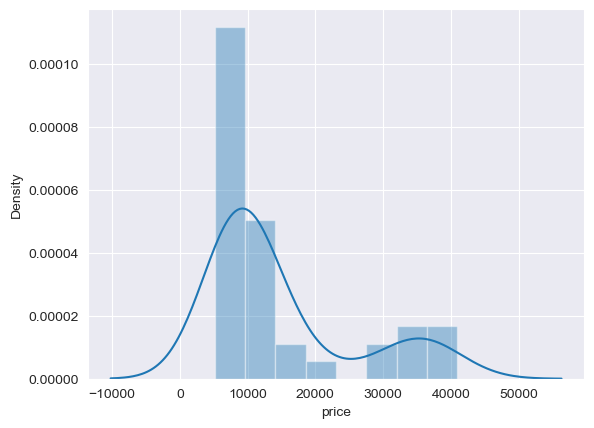

In [136]:
sns.distplot(y_test)

 We are getting nearly bell shaped curve that means our model worked good!

Checking predicted y and labeled y using a scatter plot

<Axes: ylabel='price'>

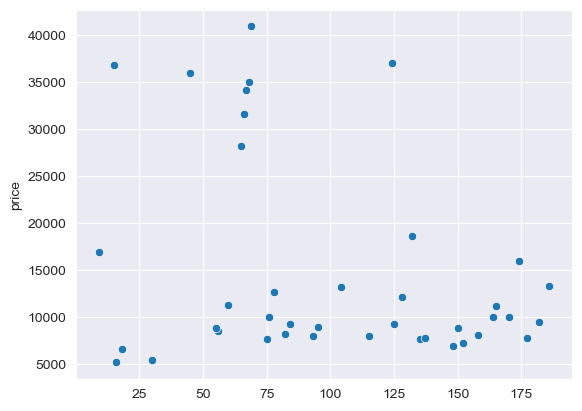

In [137]:
sns.scatterplot(y_test)

*Model Comparision Report:*
-----------------------

After an in-depth exploration of multiple regression models for our machine learning regression problem, the project culminates with a comprehensive analysis of the model performances. The key findings are summarized below:

1. *Linear Regression (R2 score = 0.87):*
   - Demonstrates a strong linear relationship, providing a solid baseline performance.

2. *SVR (R2 score = 0.84):*
   - Displays decent predictive ability, capturing complex patterns in the data.

3. *Random Forest Regression (R2 score = 0.96):*
   - Achieves an impressive R2 score, indicating a robust ensemble approach.
   - Notably, further hyperparameter tuning did not yield significant improvements, emphasizing the effectiveness of the default configuration.
   
4. *Gradient Boosting Regression (R2 score = 0.96):*
   - Emerges as the top-performing model, attaining the highest R2 score among all models.
   - Demonstrates exceptional predictive accuracy and resilience in capturing intricate data patterns.

5. *XGBoost Regression (R2 score = 0.96):*
   - Exhibits strong predictive power, with a performance on par with Random Forest Regression
   
6. *DecisionTree Regression (R2 score = 0.71):*
   - Shows a low degree of flexibility compared to other models, effectively capturing closely linear relationships.

*Conclusion:*

The Gradient Boosting Regression model stands out as the optimal choice for our regression problem, delivering unparalleled predictive performance with an R2 score of 0.96. While Random Forest Regression also performs admirably with a high R2 score of 0.96, its superiority over the default hyperparameters implies a robust and efficient algorithm.

The findings underscore the significance of careful model selection and parameter tuning in machine learning projects. The project's success is marked by the identification of a high-performing model that aligns with the specific characteristics of the dataset, paving the way for informed decision-making based on reliable predictions.

*Report on Challenges Faced in Machine Learning Regression Problem:*
------------------------

*Introduction:*
Undertaking a machine learning regression problem involves navigating various complexities. This report outlines the challenges encountered throughout the course of our regression project, shedding light on the hurdles faced and the strategies employed to overcome them.

*Challenges:*

1. *Data Quality and Preprocessing:*
   - Challenge: Incomplete or noisy data impacted model performance.
   - Resolution: Rigorous data cleaning, imputation, and feature engineering to enhance data quality.

2. *Model Selection and Hyperparameter Tuning:*
   - Challenge: Choosing the right regression model and fine-tuning hyperparameters for optimal performance was intricate.
   - Resolution: Systematic model comparison, cross-validation, and grid search for hyperparameter tuning.

3. *Overfitting and Underfitting:*
   - Challenge: Balancing overfitting and underfitting in complex models.
   - Resolution: Utilizing regularization techniques, adjusting model complexity, and employing ensemble methods.

4. *Interpretable Model Outputs:*
   - Challenge: The need for interpretable model outputs for stakeholders.
   - Resolution: Employing models with built-in interpretability, like linear regression, and providing feature importance analysis.

5. *Handling Outliers:*
   - Challenge: Outliers negatively influencing model performance.
   - Resolution: Identifying and handling outliers through robust statistical methods or excluding them based on domain knowledge.

6. *Computational Resources:*
   - Challenge: Resource-intensive algorithms demanding significant computational power.
   - Resolution: Utilizing cloud-based solutions, parallel processing, or optimizing code for efficiency.

*Lessons Learned:*

- Through data preprocessing is foundational for successful regression modeling.
- A systematic approach to model selection and hyperparameter tuning is crucial.
- Striking the right balance between model complexity and generalization is key to avoiding overfitting or underfitting.
- Interpretability is essential, especially when presenting results to non-technical stakeholders.
- Outliers must be carefully addressed to prevent their adverse effects on model performance.
- Consideration of computational resources is pivotal, especially for large datasets or complex algorithms.

*Conclusion:*

The challenges faced in our machine learning regression project served as valuable learning experiences, shaping a more informed and resilient approach. Through thoughtful strategies and adaptability, we navigated the intricacies of data quality, model selection, and interpretation, ultimately leading to a robust regression solution. These experiences underscore the iterative and dynamic nature of machine learning projects, reinforcing the importance of a systematic and informed methodology.